In [8]:
# Download Station data for ModMon

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pylib import *
from datetime import datetime
import matplotlib.dates as mdates
from scipy.stats import skew
from matplotlib.offsetbox import AnchoredText
import folium
import calendar
from scipy.stats import norm
import seaborn as sns
import os

# Run in terminal if packages not installed using:
#/opt/homebrew/opt/python@3.8/bin/python3.8 -m 
#pip install pandas numpy matplotlib statsmodels folium geopy seaborn

##################################### Station Data Import ###########################################3

sta_names = ['ModMon']

file = ('/Users/kboot/phy577_projects/proj/ModMon/NREWQ_9Nov2021.csv')
stas = pd.read_csv(file)
print("Test", stas.columns)

stas = pd.DataFrame(stas.iloc[:, :12])

# Columns in ModMon Dataset: 
# ['Date', 'Year', 'Season', 'Station', 'Source', 'Depth', 'YSI_Time', 'YSI_Depth', 'YSI_Temp', 'YSI_Salinity', 'YSI_Turbidity']


##################################### Create Dataframe ###########################################3

# Fix time inputs (some error)

stas['YSI_Time'].fillna('00:00', inplace=True)
stas.loc[stas['YSI_Time'].str.startswith('-'), 'YSI_Time'] = '00:00'

# Clean dataset and prep variables

stas['Time'] = pd.to_datetime(stas['Date'] + ' ' + stas['YSI_Time'])
stas['Sal'] = np.asarray(pd.to_numeric(stas['YSI_Salinity']))
stas['Temp'] = np.asarray(pd.to_numeric(stas['YSI_Temp']))
stas['S_Dep'] = np.asarray(stas['Depth'])
stas['Depth'] = np.asarray(pd.to_numeric(stas['YSI_Depth']))

#################################### Clean Stations List ################################################

# Filter Out Unspecific Stations (coords not available)
stations_to_filter = [
    'Streets Ferry Bridge',
    'Fisher Landing',
    'Camp Seafarer',
    'Union Point Neuse',
    'Union Point Trent',
    'Neuse River at Kinston'
]

# Filter out rows with specified station names
stas = stas[~stas['Station'].isin(stations_to_filter)]

# Assuming 'S' is your DataFrame
name_err = ['20', '30', '50', '60', '70', '100', '120', '140', '160', '180', '0']
stas['Station'] = stas['Station'].replace(name_err, [20, 30, 50, 60, 70, 100, 120, 140, 160, 180, 0])

stations = stas['Station'].unique()
#print(stations)

#################################### Create Dataframes ################################################

S = stas[['Time', 'Season', 'Station', 'S_Dep', 'Depth', 'Sal']]
T = stas[['Time', 'Season', 'Station', 'S_Dep', 'Depth', 'Temp']]

S = S[S['Depth'] > -1000]
S.drop(S[S['Sal'] < 0].index, inplace=True)
S.dropna(subset = ['Sal'], inplace = True)

T.drop(T[T['Temp'] < -15].index, inplace=True)
T.dropna(subset = ['Temp'], inplace = True)

########################################## Sort by Station ########################################################

# Remove Statons 80 and 130 due to no data collected

stations = stas['Station'].unique()

print(stations) 

remove_sta = [80, 130] 

# select stations based on NRE location (head at 0 to mouth at 180)

sta_select = [0, 20, 30, 50, 60, 70, 100, 120, 140, 160, 180]

# Create a dataframe for each selected station

S_sta = {}

for sta in sta_select:
    S_sta[sta] = {'sta': S[(S['Station'] == sta)]}
    
#print(S[(S['Station'] == 20)])
#print(S_sta[0])

sta_select_four = [20, 100, 140, 180]

S_sta_prof = {}
for sta in sta_select_four:
    S_sta_prof[sta] = {'sta': S[(S['Station'] == sta)]}
    

/var/folders/zy/lmbjt0ls4mdd8y8k61lksbhw0000gn/T/ipykernel_71664/2854322907.py:26: DtypeWarning: Columns (3,32,33,47,51,78,79,81,82,85,86) have mixed types. Specify dtype option on import or set low_memory=False.
  stas = pd.read_csv(file)
/var/folders/zy/lmbjt0ls4mdd8y8k61lksbhw0000gn/T/ipykernel_71664/2854322907.py:44: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stas['Time'] = pd.to_datetime(stas['Date'] + ' ' + stas['YSI_Time'])


Test Index(['Date', 'Year', 'Season', 'Station', 'Source', 'Depth', 'YSI_Time',
       'YSI_Depth', 'YSI_Temp', 'YSI_SpecCond', 'YSI_Salinity', 'YSI_DOsat',
       'YSI_DO', 'YSI_pH', 'YSI_Turbidity', 'YSI_Chlraw', 'YSI_Chl', 'YSI_BP',
       'Secchi', 'Kd', 'CDOM', 'Cdom Corrected', 'POC', 'PN', 'CtoN', 'DOC',
       'DIC', 'NO3/NO2', 'NH4', 'DIN', 'TDN', 'DON', 'PO4', 'NtoP', 'SiO2',
       'Chla_IWS', 'Correct Chla_IV', 'PPR', 'Chlide_a', 'Chl_c1c2',
       'Perid corr', 'But_fuco', 'Phide_a', 'Fuco corr', 'Hex_fuco', 'Neo',
       'Pras', 'Viola', 'Diadino', 'Anth', 'Myxo', 'Allo corr', 'Diato',
       'Monado', 'Lut', 'Zea corr', 'Gyro', 'Cantha', 'Chl_b corr', 'DV_chl_a',
       'Chl_a corr', 'Echin', 'Phytin_a', 'B_car', 'TotalChla', 'Chlorophytes',
       'Cryptophytes', 'Cyanobacteria', 'Diatoms', 'Dinoflagellates',
       'Total_Chla', 'Comments for:', 'Comments', 'Comments for:.1',
       'Comments.1', 'Unnamed: 75', 'Unnamed: 76', 'Chla_IV Uncorrected',
       'Unnamed: 78'

/var/folders/zy/lmbjt0ls4mdd8y8k61lksbhw0000gn/T/ipykernel_71664/2854322907.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T.drop(T[T['Temp'] < -15].index, inplace=True)
/var/folders/zy/lmbjt0ls4mdd8y8k61lksbhw0000gn/T/ipykernel_71664/2854322907.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  T.dropna(subset = ['Temp'], inplace = True)


In [10]:
####################################### Stats Calc Revision ##############################

#print(S_sta[0])

#print(S_sta.items())

# Assuming S is the main DataFrame and sta_select is the list of stations

sta_stats = {}

for sta in sta_select:
    sal_data = S[S['Station'] == sta]
    if not sal_data.empty:
        sal_vals = sal_data['Sal']
        sta_stats[sta] = {
            'Mean': sal_vals.mean(),
            'Standard Deviation': sal_vals.std(),
            'Variance': sal_vals.var(),
            'Skew': sal_vals.skew()
        }
    
# Print  for each station


for sta, stats in sta_stats.items():
    print(f"Station: {sta}")
    for stat, value in stats.items():
        print(f"{stat}: {round(value, 3)}")
    print()

'''

########################################## Correlation Analysis ###############################################


# Iterate through each station
for station in sta_select_four:
    sta_data = S_sta_prof.get(station, {}).get('sta', None)
    if sta_data is not None:
        # Ensure 'Sal' column is numeric
        sta_data['Sal'] = pd.to_numeric(sta_data['Sal'], errors='coerce')
        
        # Create dummy variables for 'Season'
        dummy_seasons = pd.get_dummies(sta_data['Season'])
        
        # Concatenate the dummy variables with the salinity data
        combined_data = pd.concat([sta_data['Sal'], dummy_seasons], axis=1)
        
        # Calculate correlations between salinity and each season
        correlations = combined_data.corr()['Sal'].drop('Sal')
        
        print(f"Station {station}:")
        print("Correlation between Salinity and each season:")
        print(correlations)

#### Unsuccessful so far -- individual years instead? Eventual monthly breakdown and correlation...

'''

Station: 0
Mean: 0.18
Standard Deviation: 0.892
Variance: 0.795
Skew: 8.612

Station: 20
Mean: 1.275
Standard Deviation: 3.044
Variance: 9.267
Skew: 3.044

Station: 30
Mean: 3.616
Standard Deviation: 4.819
Variance: 23.225
Skew: 1.368

Station: 50
Mean: 5.229
Standard Deviation: 5.282
Variance: 27.903
Skew: 0.846

Station: 60
Mean: 6.777
Standard Deviation: 5.442
Variance: 29.62
Skew: 0.518

Station: 70
Mean: 7.229
Standard Deviation: 5.517
Variance: 30.433
Skew: 0.463

Station: 100
Mean: 9.799
Standard Deviation: 5.717
Variance: 32.688
Skew: 0.162

Station: 120
Mean: 10.853
Standard Deviation: 5.776
Variance: 33.366
Skew: 0.16

Station: 140
Mean: 12.516
Standard Deviation: 5.578
Variance: 31.119
Skew: -0.055

Station: 160
Mean: 14.515
Standard Deviation: 5.787
Variance: 33.492
Skew: 0.064

Station: 180
Mean: 16.085
Standard Deviation: 4.907
Variance: 24.079
Skew: -0.154



'\n\n########################################## Correlation Analysis ###############################################\n\n\n# Iterate through each station\nfor station in sta_select_four:\n    sta_data = S_sta_prof.get(station, {}).get(\'sta\', None)\n    if sta_data is not None:\n        # Ensure \'Sal\' column is numeric\n        sta_data[\'Sal\'] = pd.to_numeric(sta_data[\'Sal\'], errors=\'coerce\')\n        \n        # Create dummy variables for \'Season\'\n        dummy_seasons = pd.get_dummies(sta_data[\'Season\'])\n        \n        # Concatenate the dummy variables with the salinity data\n        combined_data = pd.concat([sta_data[\'Sal\'], dummy_seasons], axis=1)\n        \n        # Calculate correlations between salinity and each season\n        correlations = combined_data.corr()[\'Sal\'].drop(\'Sal\')\n        \n        print(f"Station {station}:")\n        print("Correlation between Salinity and each season:")\n        print(correlations)\n\n#### Unsuccessful so far -- ind

In [13]:
######################################## Plots #############################################################


##################################### Plot Stats ##############################################################



stations = list(sta_stats.keys())

means = [stats['Mean'] for stats in sta_stats.values()]
std_dev = [stats['Standard Deviation'] for stats in sta_stats.values()]
var = [stats['Variance'] for stats in sta_stats.values()]
skew = [stats['Skew'] for stats in sta_stats.values()]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12), sharex=True)
ax1.scatter(stations, means, color='red')
ax1.set_ylabel('Mean Salinity (PSU)', fontsize=14)
ax1.set_title('ModMon Station Salinity Statistics', fontsize=20)
ax1.grid(True)

ax2.scatter(stations, std_dev, color='green')
ax2.set_ylabel('Standard Deviation', fontsize=14)
ax2.grid(True)

ax3.scatter(stations, var, color='blue')
ax3.set_ylabel('Variance', fontsize=14)
ax3.set_xlabel('Station Number', fontsize=14)
plt.xticks(stations)  
ax3.grid(True)

ax4.scatter(stations, skew, color='orange')
ax4.set_ylabel('Skew', fontsize=14)
ax4.set_xlabel('Station Number', fontsize=14)
plt.xticks(stations)  
ax4.grid(True)


output_dir = '/Users/kboot/phy577_projects/proj/figures'
plt.savefig(os.path.join(output_dir, '1_MM_Stats.png'))

############################# Salinity v depth w/ Season at four stations ############################################

for station in sta_select_four:
    sta_data = S_sta_prof.get(station, {}).get('sta', None)
    if sta_data is not None:
    
        seasons = {'Winter': 'blue', 'Summer': 'orange', 'Spring': 'green', 'Fall': 'red'}
        colors = sta_data['Season'].map(seasons)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(sta_data['Time'], sta_data['Sal'], c=colors)
        plt.xlabel('Time')
        plt.ylabel('Salinity (PSU)')
        plt.title(f'Salinity Time Series for Station {station}')
        plt.grid(True)
        
        # Add legend for season colors
        handles = [plt.Line2D([], [], marker='o', color=color, linestyle='None') for color in seasons.values()]
        labels = list(seasons.keys())
        plt.legend(handles, labels)
        
        output_dir = '/Users/kboot/phy577_projects/proj/figures'
        plt.savefig(os.path.join(output_dir, f'2_MM_series_{station}.png'))

        ############################## Depth Profiles #################################################################

        plt.figure(figsize=(10, 6))
        plt.scatter(sta_data['Sal'], sta_data['Depth'], c=colors)
        plt.ylabel('Depth(m)')
        plt.xlabel('Salinity (PSU)')
        plt.title(f'Salinity Depth Profile for Station {station}')
        plt.grid(True)
        plt.gca().invert_yaxis()  # Invert the y-axis
        
        handles = [plt.Line2D([], [], marker='o', color=color, linestyle='None') for color in seasons.values()]
        labels = list(seasons.keys())
        plt.legend(handles, labels)
        
        output_dir = '/Users/kboot/phy577_projects/proj/figures'
        plt.savefig(os.path.join(output_dir, f'3_MM_depthprof_{station}.png'))
        


############################# Histograms - S and B Salinity, all years ##########################################3

for station in sta_select_four:
    sta_data = S_sta_prof.get(station, {}).get('sta', None)
    if sta_data is not None:
        # Filter data for 'S' and 'B' categories in 'S_Dep' column
        S_Dep_S = sta_data[sta_data['S_Dep'] == 'S']['Sal']
        S_Dep_B = sta_data[sta_data['S_Dep'] == 'B']['Sal']

        # Calculate bin numbers using Scott's rule
        n_bins_s = int((S_Dep_S.max() - S_Dep_S.min()) / (3.5 * S_Dep_S.std() / len(S_Dep_S) ** (1 / 3)))
        n_bins_b = int((S_Dep_B.max() - S_Dep_B.min()) / (3.5 * S_Dep_B.std() / len(S_Dep_B) ** (1 / 3)))

        # Create subplots
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot for 'S_Dep S' using Scott's rule bin number
        axes[0].hist(S_Dep_S, bins=n_bins_s, alpha=0.5, label='Surface Salinity', color='blue', density=True)

        # Fit a Gaussian distribution to 'S_Dep_S' data (Theoretical PDF)
        mean_s, std_dev_s = norm.fit(S_Dep_S)
        x_s = np.linspace(S_Dep_S.min(), S_Dep_S.max(), 100)
        p_s = norm.pdf(x_s, mean_s, std_dev_s)
        axes[0].plot(x_s, p_s, 'k', linewidth=2, label='Theoretical PDF')

        # Plot empirical PDF for 'S_Dep S'
        sns.kdeplot(S_Dep_S, color='red', label='Empirical PDF', ax=axes[0])
        
        # mean line
        Smean = S_Dep_S.mean()
        axes[0].axvline(x=Smean, color='red', linestyle='--', label=f'Mean: {Smean:.2f} m')

        axes[0].set_xlabel('Surface Salinity (PSU)')
        axes[0].set_ylabel('Density')
        axes[0].set_title(f'Surface Salinity Distribution for Station {station}')
        axes[0].legend()
        axes[0].grid(True)

        # Plot for 'S_Dep B' using Scott's rule bin number
        axes[1].hist(S_Dep_B, bins=n_bins_b, alpha=0.5, label='Bottom Salinity', color='orange', density=True)

        # Fit a Gaussian distribution to 'S_Dep_B' data (Theoretical PDF)
        mean_b, std_dev_b = norm.fit(S_Dep_B)
        x_b = np.linspace(S_Dep_B.min(), S_Dep_B.max(), 100)
        p_b = norm.pdf(x_b, mean_b, std_dev_b)
        axes[1].plot(x_b, p_b, 'k', linewidth=2, label='Theoretical PDF')

        # Plot empirical PDF for 'S_Dep B'
        sns.kdeplot(S_Dep_B, color='red', label='Empirical PDF', ax=axes[1])
        
        Bmean = S_Dep_B.mean()
        axes[1].axvline(x=Bmean, color='red', linestyle='--', label=f'Mean: {Bmean:.2f} m')

        axes[1].set_xlabel('Salinity (PSU)')
        axes[1].set_ylabel('Density')
        axes[1].set_title(f'Bottom Salinity Distribution for Station {station}')
        axes[1].legend()
        axes[1].grid(True)

        plt.tight_layout()
        
        output_dir = '/Users/kboot/phy577_projects/proj/figures'
        plt.savefig(os.path.join(output_dir, f'4_MM_SBhistScott_{station}.png'))

#################################### Season Histograms for S and B #########################################

season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Fall': 'orange'}

for station in sta_select_four:
    sta_data = S_sta_prof.get(station, {}).get('sta', None)
    if sta_data is not None:
        seasons = ['Winter', 'Spring', 'Summer', 'Fall']
        
        # Create subplots for each season
        fig, axes = plt.subplots(1, len(seasons), figsize=(16, 4), sharey=True)
        fig.suptitle(f'Salinity Distribution by Season for Station {station}', fontsize=16)
        
        for i, season in enumerate(seasons):
            salinity_by_season = sta_data[sta_data['Season'] == season]['Sal']
            
            # Calculate bin numbers using Scott's rule
            n_bins = int((salinity_by_season.max() - salinity_by_season.min()) / (3.5 * salinity_by_season.std() / len(salinity_by_season) ** (1 / 3)))
            #print(n_bins)
            # Plot the histogram
            #counts, bins, _ = axes[i].hist(salinity_by_season, bins=n_bins, alpha=0.5, label=season, color=season_colors[season])
            
            axes[i].hist(salinity_by_season, bins=n_bins, alpha=0.5, label=season, color=season_colors[season], density=True)

            axes[i].set_xlabel('Salinity (PSU)')
            axes[i].set_ylabel('Frequency')
            axes[i].set_title(season)
            axes[i].legend()
            axes[i].grid(True)
            
            # Fit a Gaussian distribution to data (Theoretical PDF)
            mean_b, std_dev_b = norm.fit(salinity_by_season)
            x_b = np.linspace(salinity_by_season.min(), salinity_by_season.max(), 100)
            p_b = norm.pdf(x_b, mean_b, std_dev_b)
    
            # Plot the theoretical PDF
            axes[i].plot(x_b, p_b, 'k', linewidth=2, label='Theoretical PDF')
            
            # Empirical
            sns.kdeplot(salinity_by_season, color='red', label='Empirical PDF', ax=axes[i])
            
            # Mean Line
            seas_mean = salinity_by_season.mean()
            axes[i].axvline(x=seas_mean, color='red', linestyle='--', label=f'Mean: {seas_mean:.2f} m')

            axes[i].legend(loc='upper right')
            
        plt.tight_layout()
        output_dir = '/Users/kboot/phy577_projects/proj/figures'
        plt.savefig(os.path.join(output_dir, f'5_MM_seashistScott_{station}.png'))

 

In [27]:
       
        
############################ Select specific years, then plot for all stations #####################################

years = [2002, 2019]

fig, axes = plt.subplots(len(sta_select_four), len(years), figsize=(12, 8), sharex='col')

for i, station in enumerate(sta_select_four):
    for j, year in enumerate(years):
        sta_data = S_sta_prof[station]['sta']
        data_year = sta_data[sta_data['Time'].dt.year == year]

        # Filter data for surface ('S_Dep' == 'S') and bottom ('S_Dep' == 'B') salinity
        surface_sal = data_year[data_year['S_Dep'] == 'S']
        bottom_sal = data_year[data_year['S_Dep'] == 'B']
        
        meanS = surface_sal['Sal'].mean()  # Calculating mean for surface salinity
        meanB = bottom_sal['Sal'].mean()   # Calculating mean for bottom salinity
        
        axes[i, j].scatter(surface_sal['Time'], surface_sal['Sal'], color='blue', label='Surface Salinity')
        axes[i, j].scatter(bottom_sal['Time'], bottom_sal['Sal'], color='orange', label='Bottom Salinity')
        axes[i, j].set_ylabel('Salinity (PSU)')
        axes[i, j].set_title(f'{year} - Station {station}')
        axes[i, j].tick_params(axis='x', rotation=315)  # Rotate x-axis ticks
       
        #axes[i, j].text(0.5, 0.95, f"SS Mean: {meanS:.2f}\nBS Mean: {meanB:.2f}", fontsize=8, ha='center', va='top', transform=axes[i, j].transAxes, bbox=dict(facecolor='white', alpha=0.8))

        axes[0, 1].legend(loc='best')

        for ax in axes[-1]:
            ax.set_xlabel('Time')

        plt.tight_layout()

output_dir = '/Users/kboot/phy577_projects/proj/figures'
plt.savefig(os.path.join(output_dir, f'7_MM_yearcomp_{years}.png'))

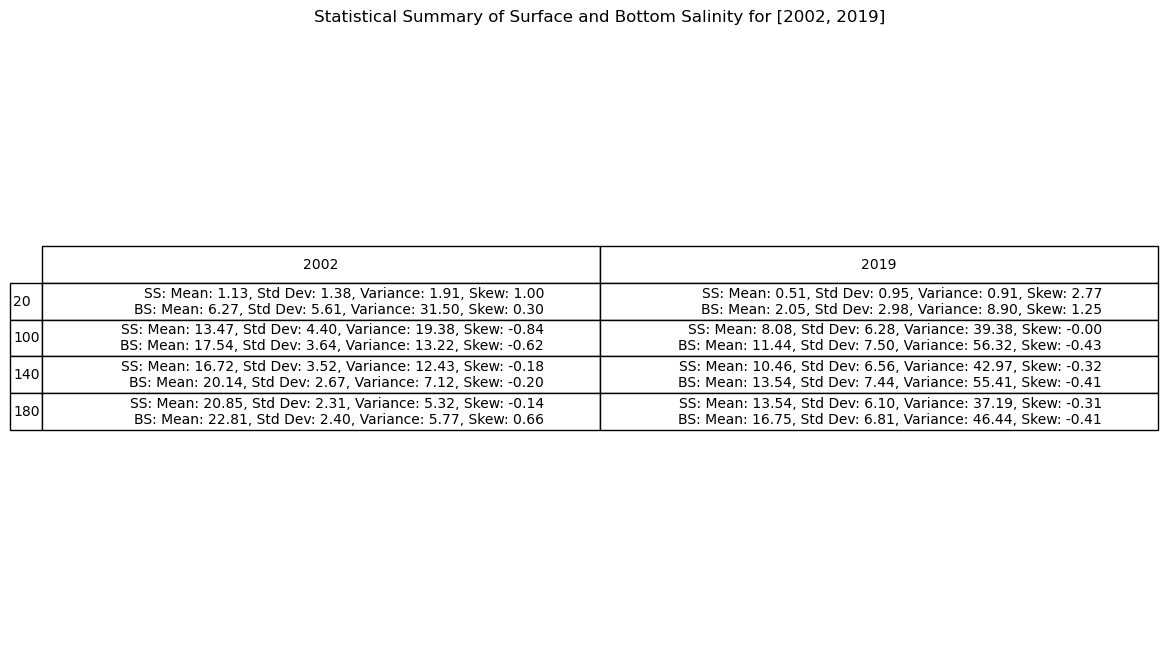

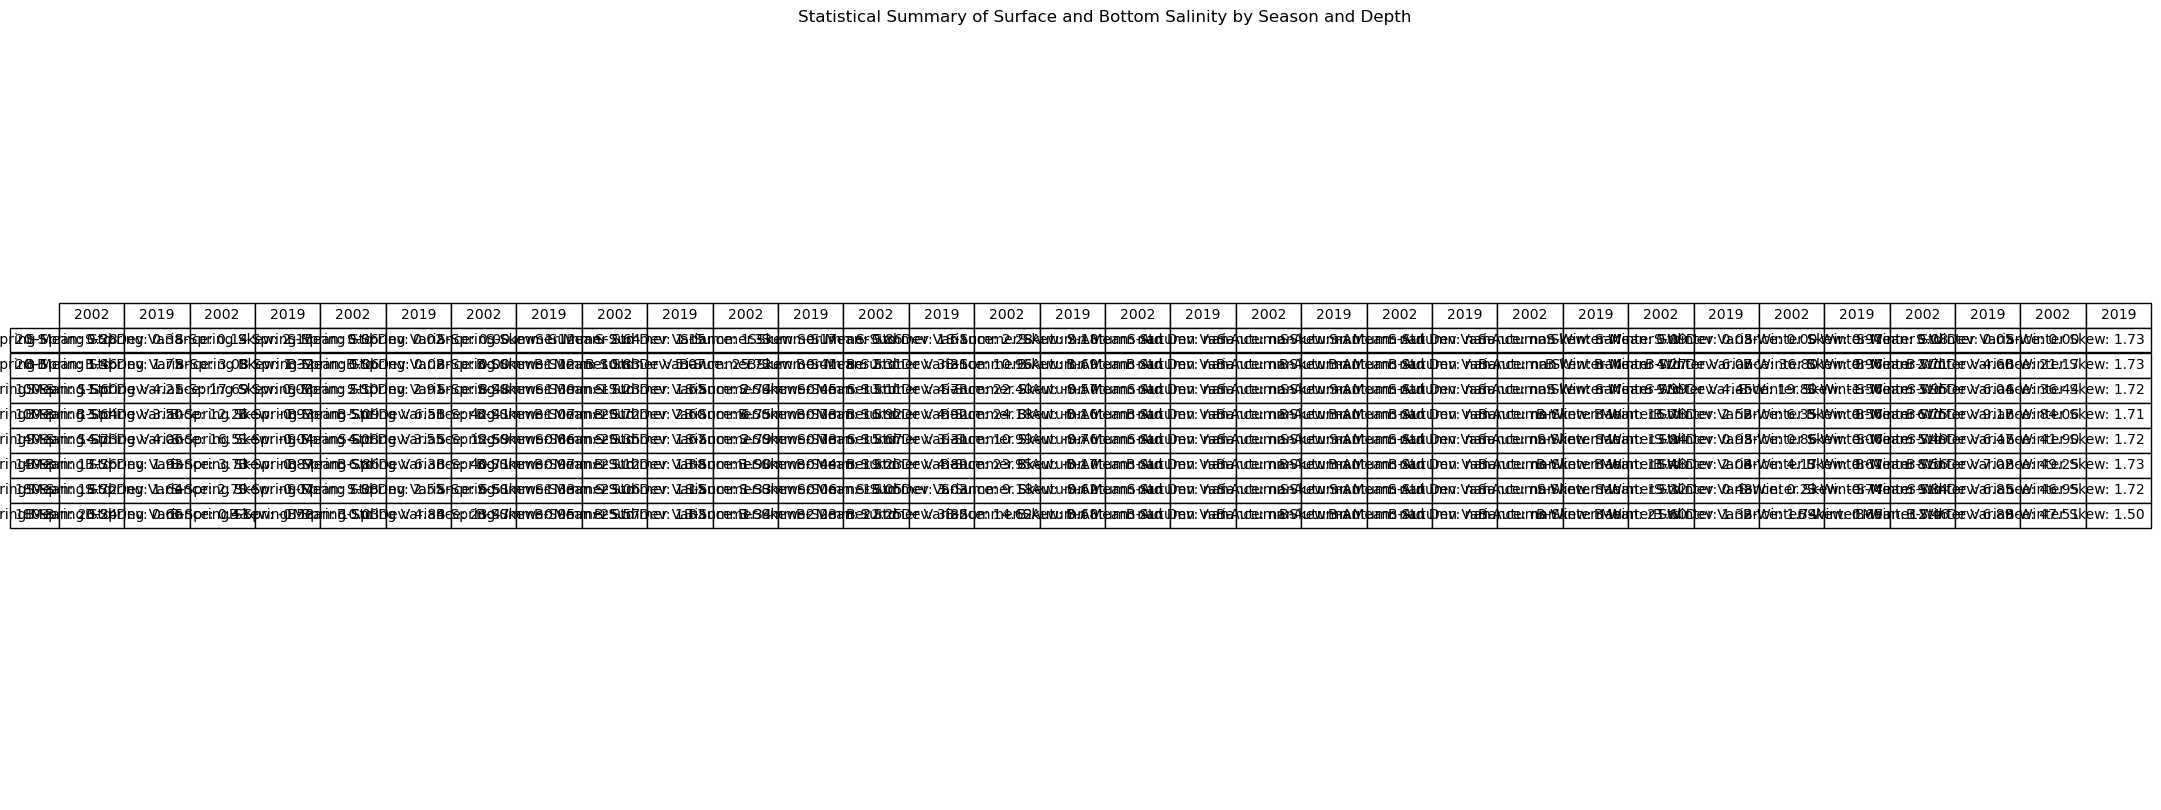

<Figure size 640x480 with 0 Axes>

In [39]:
# Create a table to store statistical values
data = []
for station in sta_select_four:
    row = []
    for year in years:
        sta_data = S_sta_prof[station]['sta']
        data_year = sta_data[sta_data['Time'].dt.year == year]

        surface_sal = data_year[data_year['S_Dep'] == 'S']
        bottom_sal = data_year[data_year['S_Dep'] == 'B']

        meanS = surface_sal['Sal'].mean()
        meanB = bottom_sal['Sal'].mean()
        
        stdS = surface_sal['Sal'].std()
        stdB = bottom_sal['Sal'].std()

        varS = surface_sal['Sal'].var()
        varB = bottom_sal['Sal'].var()

        skewS = surface_sal['Sal'].skew()
        skewB = bottom_sal['Sal'].skew()

        row.append(f"SS: Mean: {meanS:.2f}, Std Dev: {stdS:.2f}, Variance: {varS:.2f}, Skew: {skewS:.2f}\nBS: Mean: {meanB:.2f}, Std Dev: {stdB:.2f}, Variance: {varB:.2f}, Skew: {skewB:.2f}")
    data.append(row)

# Plotting the main data
fig, ax = plt.subplots(figsize=(12, 8))

# Hide axes and create table
ax.axis('off')
table = ax.table(cellText=data, colLabels=years, rowLabels=sta_select_four, loc='center')

# Formatting the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 2.2)  # Adjust table size

plt.title(f'Statistical Summary of Surface and Bottom Salinity for {years}')

output_dir = '/Users/kboot/phy577_projects/proj/figures'
plt.savefig(os.path.join(output_dir, f'8_MM_yearcompstats_{years}.png'))



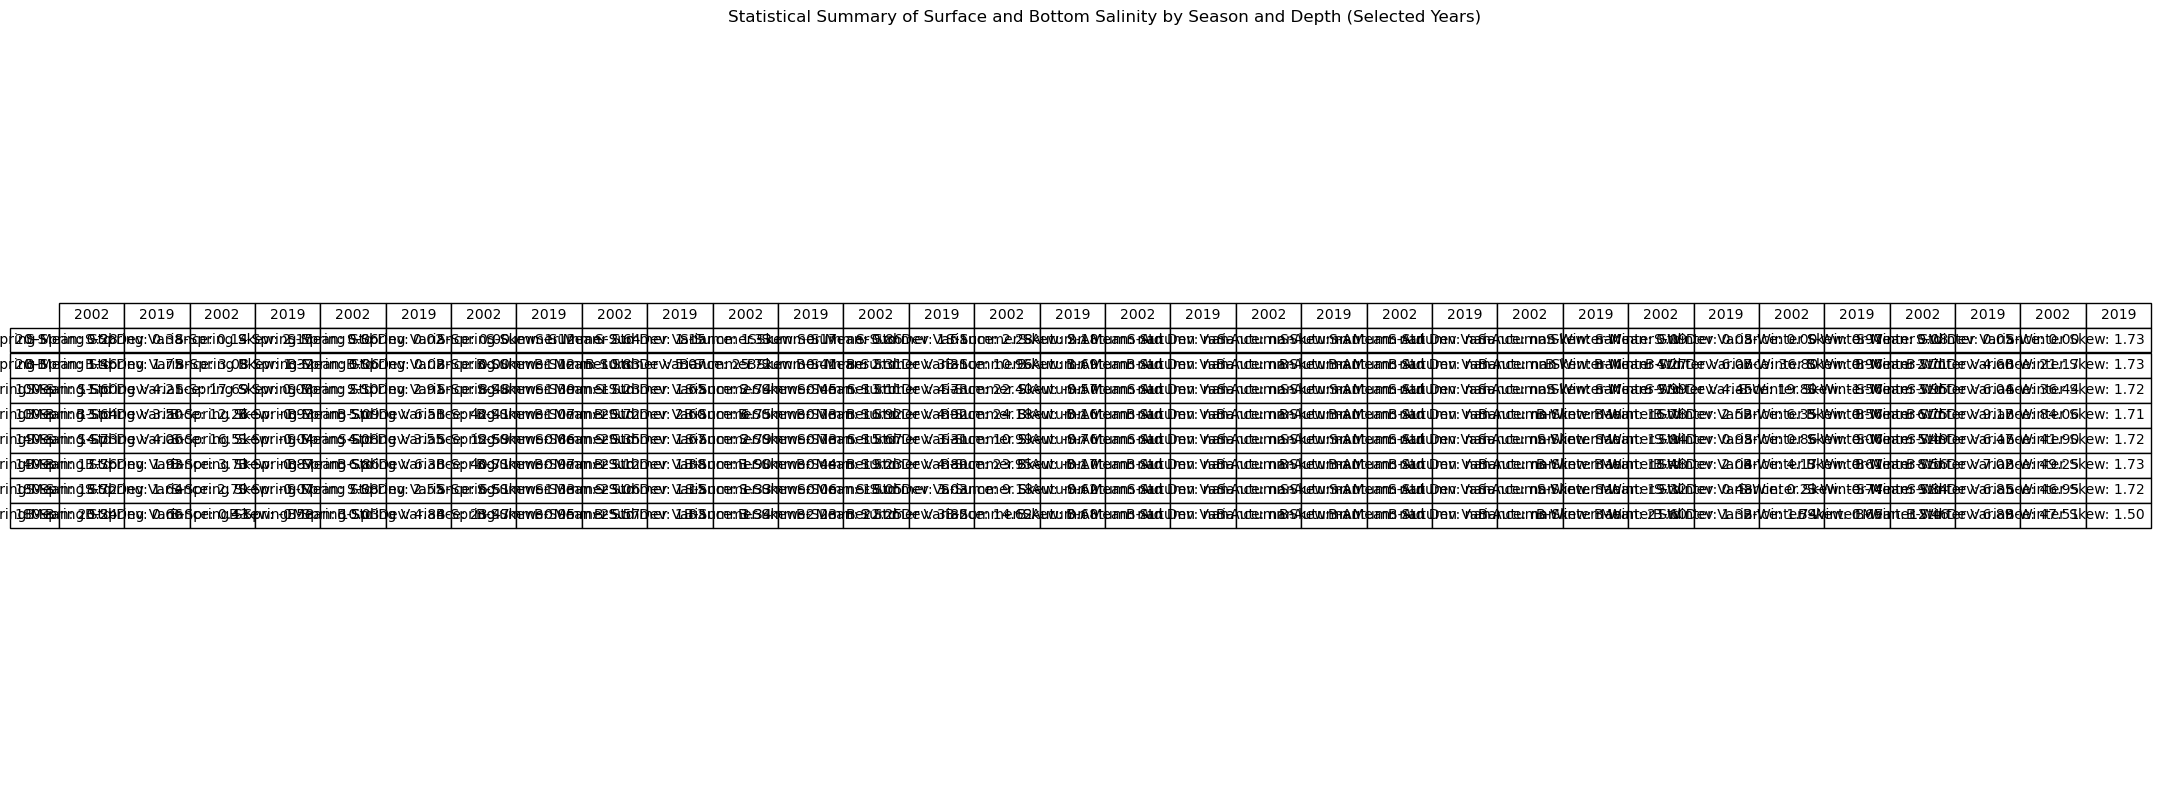

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os

selected_years = [2002, 2019]  # Change these years to your selected years

# Create a table to store statistical values divided by season and depth for the selected years
data = []
row_labels = []  # To store labels for each row
for station in sta_select_four:
    for depth in ['S', 'B']:
        row = []
        for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
            for year in selected_years:  # Loop through selected years
                sta_data = S_sta_prof[station]['sta']
                data_year = sta_data[(sta_data['Time'].dt.year == year) & (sta_data['S_Dep'] == depth)]

                season_sal = data_year[data_year['Season'] == season]

                if not season_sal.empty:
                    mean = season_sal['Sal'].mean()
                    std = season_sal['Sal'].std()
                    var = season_sal['Sal'].var()
                    skew = season_sal['Sal'].skew()
                else:
                    mean, std, var, skew = np.nan, np.nan, np.nan, np.nan

                row.extend([f"{depth}-{season} Mean: {mean:.2f}", f"{depth}-{season} Std Dev: {std:.2f}", f"{depth}-{season} Variance: {var:.2f}", f"{depth}-{season} Skew: {skew:.2f}"])
        
        # Store labels for each station-depth combination
        row_labels.append(f"{station}-{depth}")

        data.append(row)

# Plotting the main data
fig, ax = plt.subplots(figsize=(18, 10))

# Hide axes and create table
ax.axis('off')
table = ax.table(cellText=data, colLabels=np.tile(selected_years, 16), rowLabels=row_labels, loc='center')

# Formatting the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.5)  # Adjust table size

plt.title('Statistical Summary of Surface and Bottom Salinity by Season and Depth (Selected Years)')
plt.show()

# Save figure
output_dir = '/Users/kboot/phy577_projects/proj/figures'
plt.savefig(os.path.join(output_dir, f'9_MM_yearseascompstats_selected_years.png'))


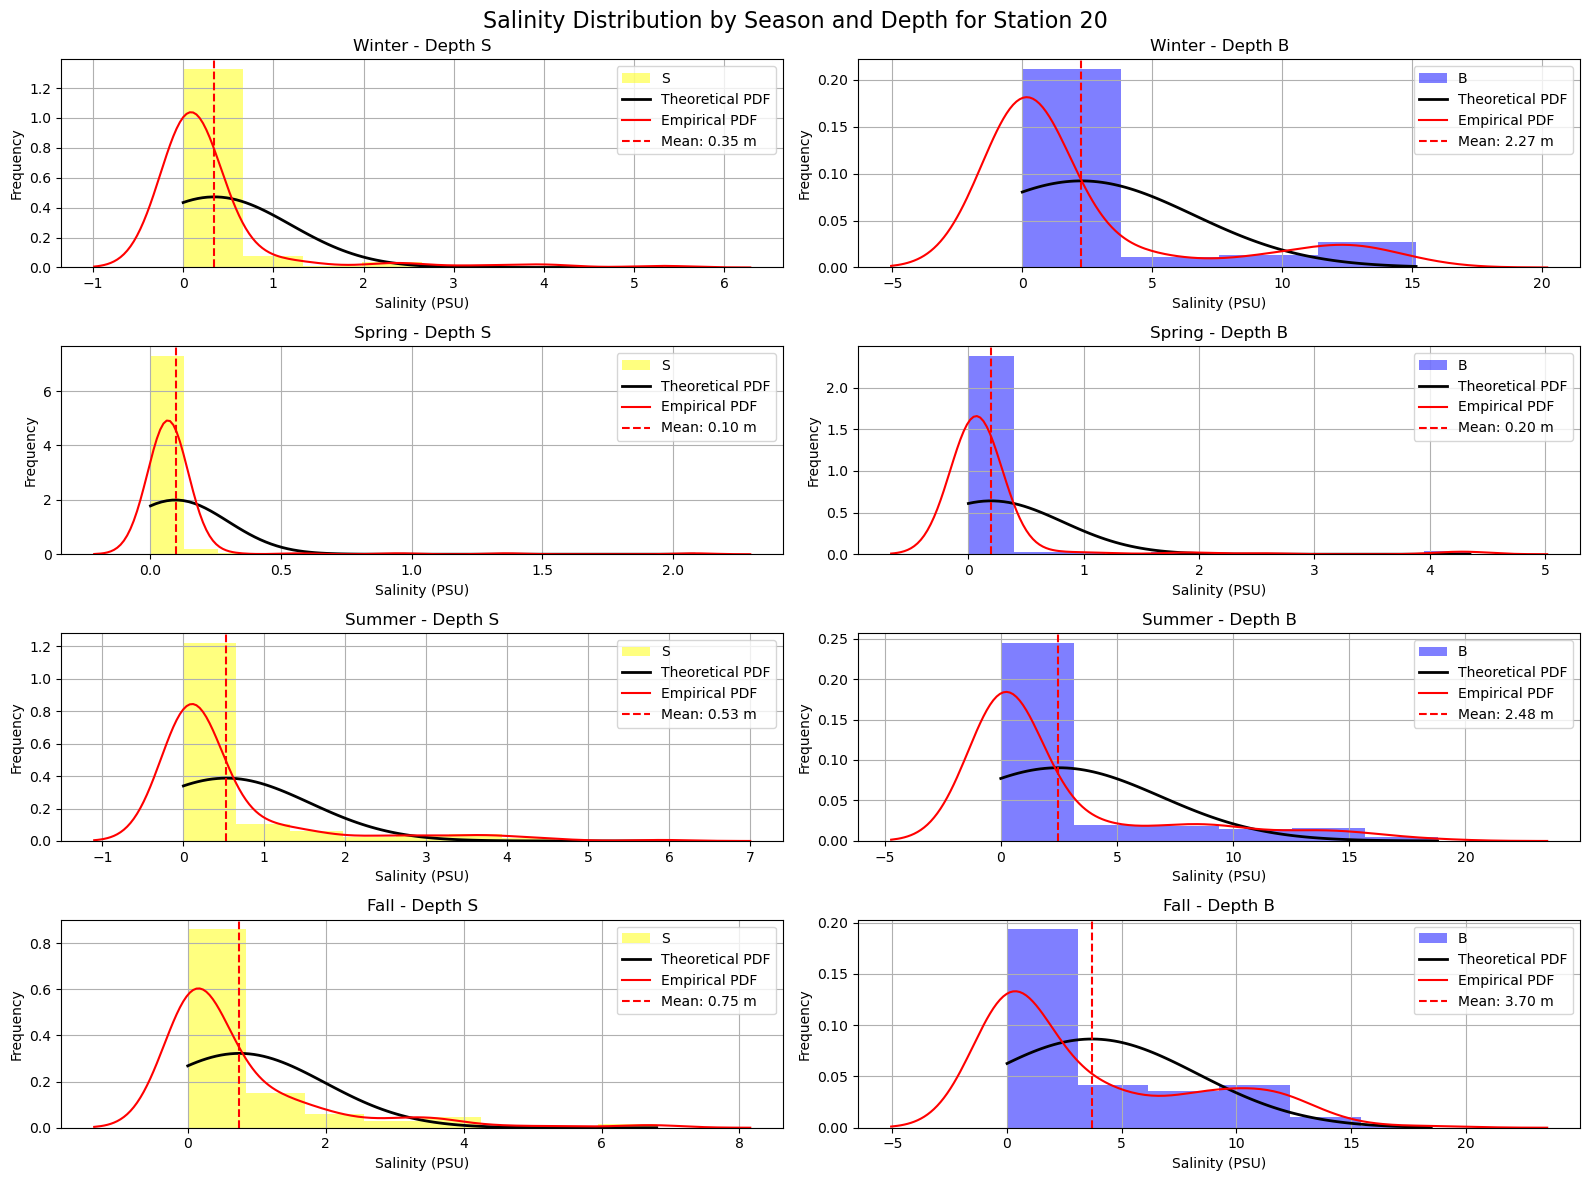

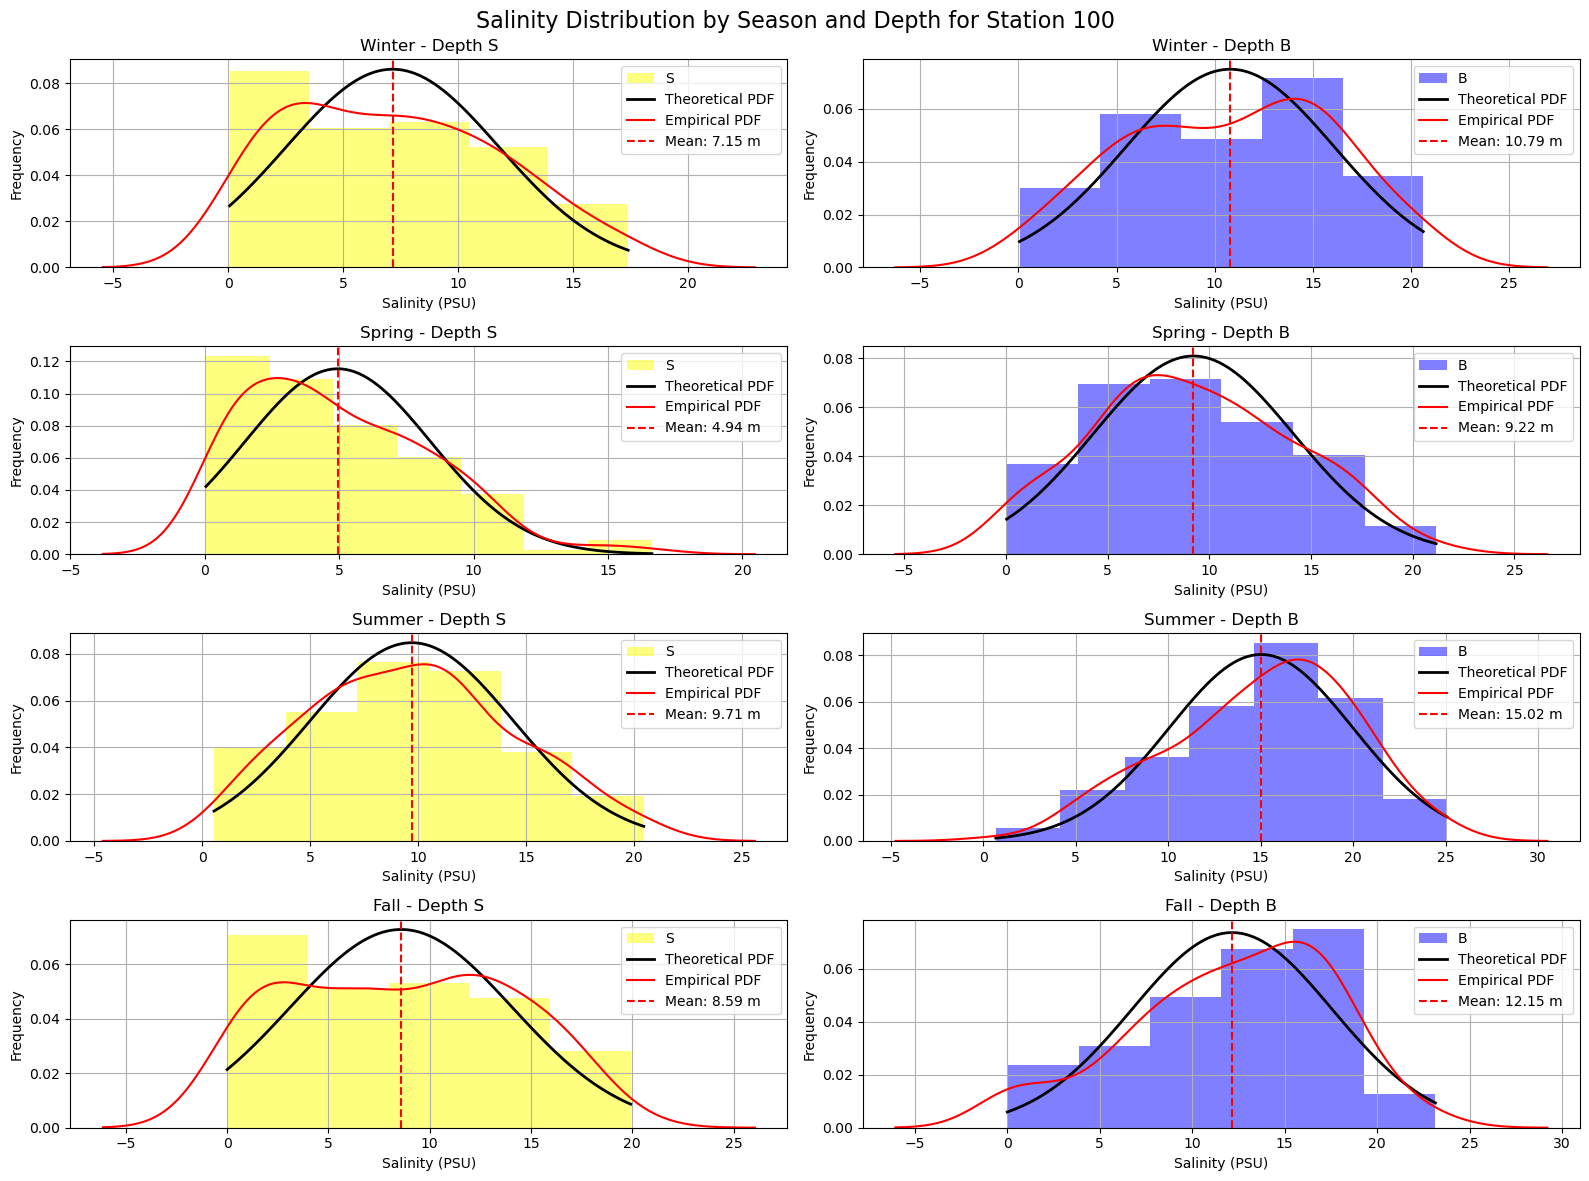

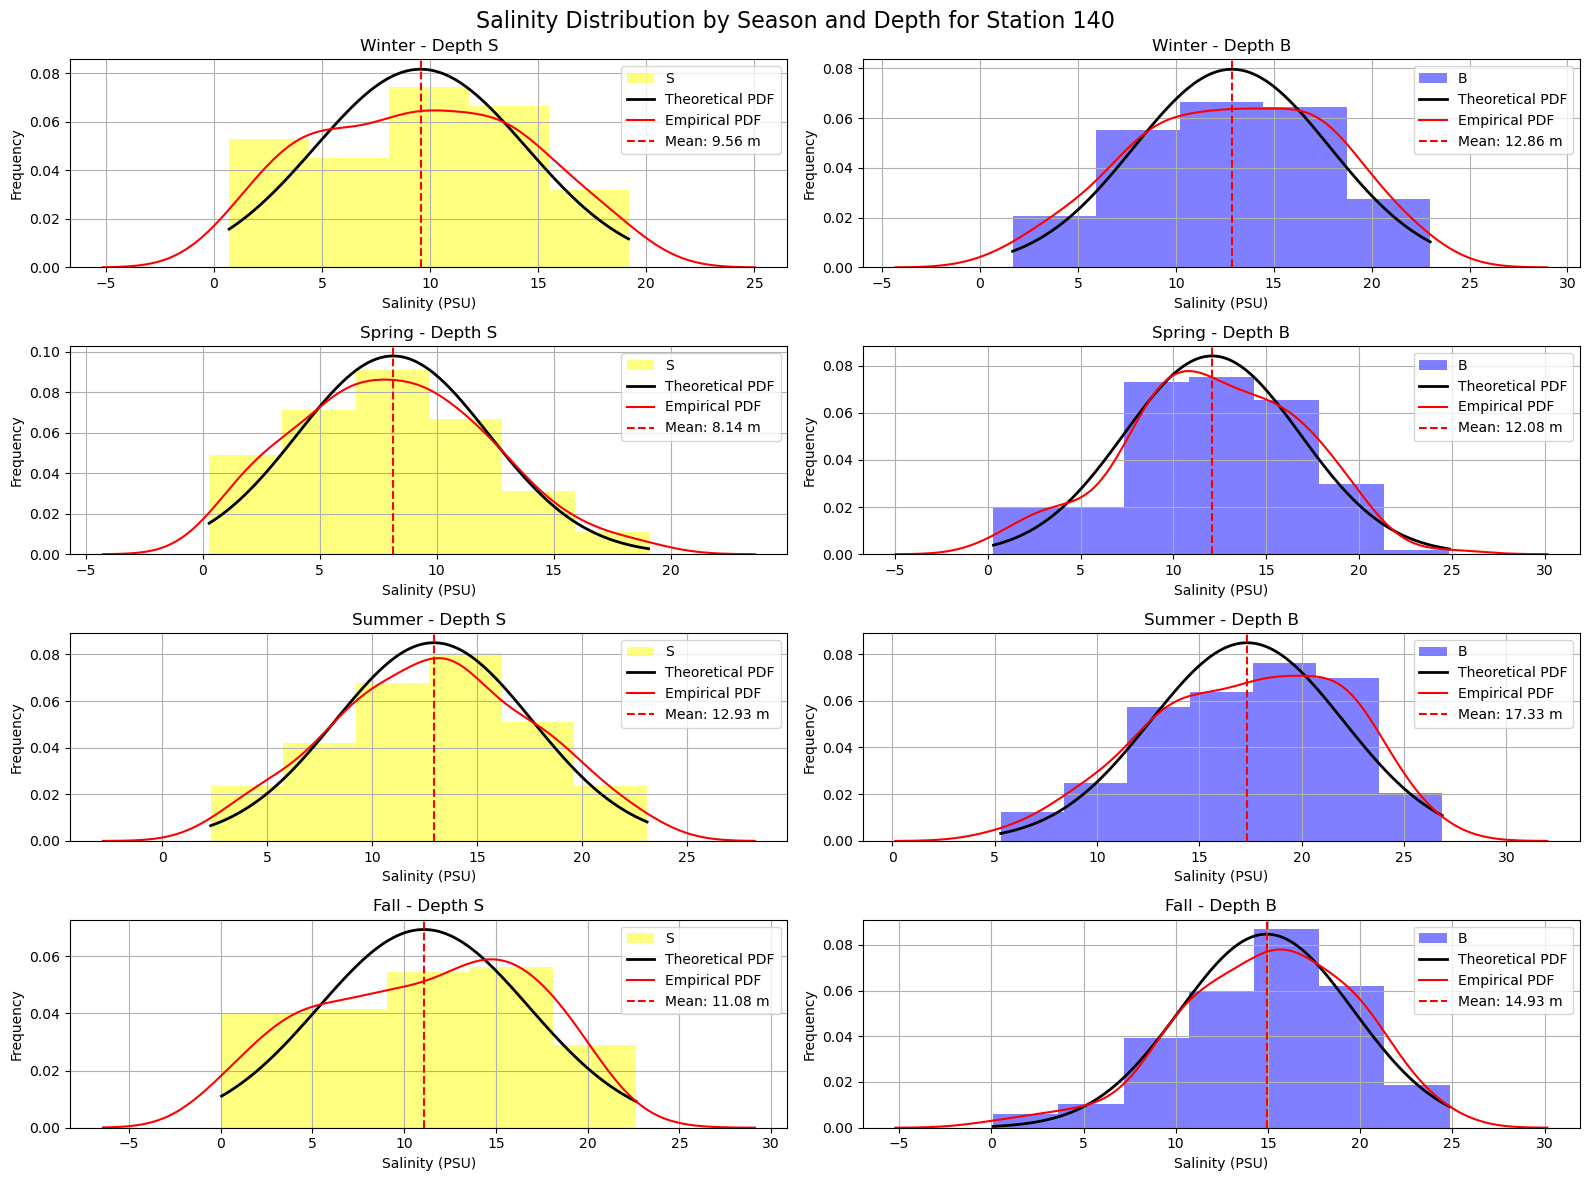

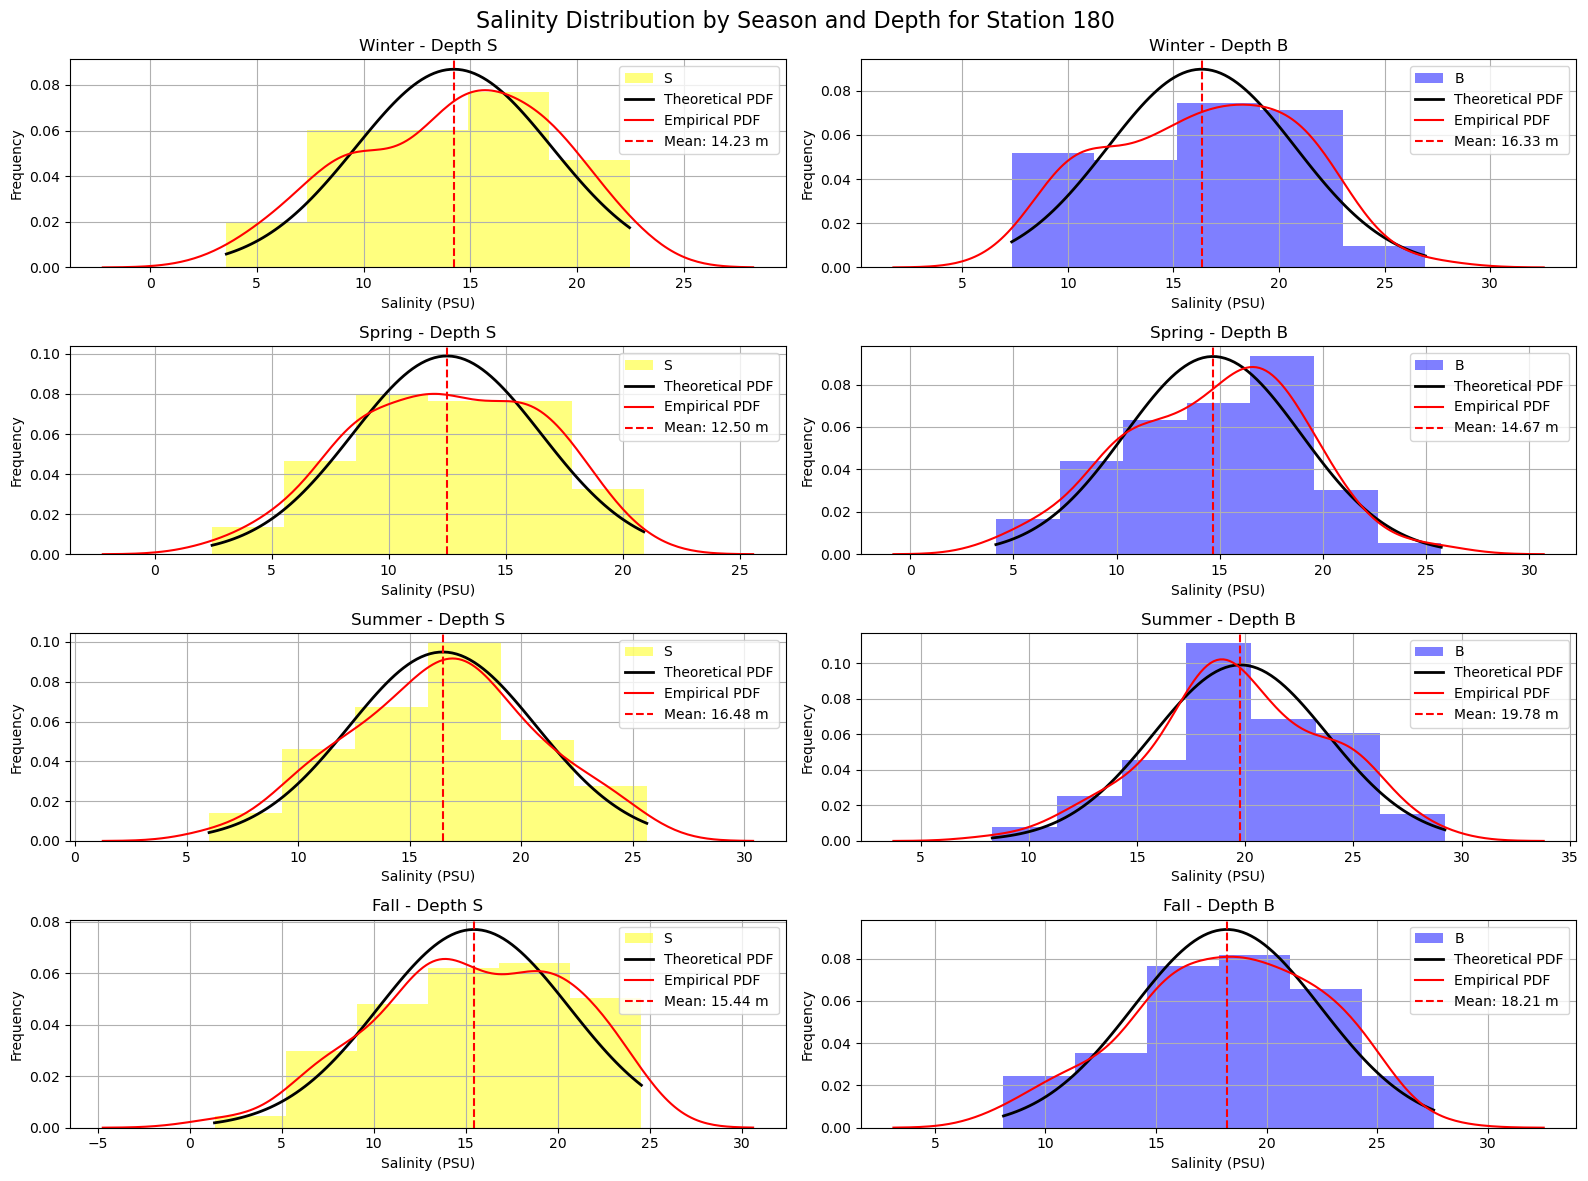

In [299]:
##################################### Dep and Season Histograms ###########################################

season_colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Fall': 'orange'}
depth_colors = {'S': 'yellow', 'B': 'blue'}

for station in sta_select_four:
    sta_data = S_sta_prof.get(station, {}).get('sta', None)
    if sta_data is not None:
        seasons = ['Winter', 'Spring', 'Summer', 'Fall']
        
        # Create subplots for each season
        fig, axes = plt.subplots(len(seasons), 2, figsize=(16, 12))
        fig.suptitle(f'Salinity Distribution by Season and Depth for Station {station}', fontsize=16)
        
        for i, season in enumerate(seasons):
            salinity_by_season = sta_data[sta_data['Season'] == season]
            
            for j, depth in enumerate(['S', 'B']):
                salinity_by_depth = salinity_by_season[salinity_by_season['S_Dep'] == depth]['Sal']
                
                # Calculate bin numbers using Scott's rule
                n_bins = int((salinity_by_depth.max() - salinity_by_depth.min()) / (3.5 * salinity_by_depth.std() / len(salinity_by_depth) ** (1 / 3)))
                
                # Plot the histogram for each depth within the season subplot
                axes[i, j].hist(salinity_by_depth, bins=n_bins, alpha=0.5, label=depth, color=depth_colors[depth], density=True)
                axes[i, j].set_xlabel('Salinity (PSU)')
                axes[i, j].set_ylabel('Frequency')
                axes[i, j].set_title(f'{season} - Depth {depth}')
                axes[i, j].legend()
                axes[i, j].grid(True)
                
                # Fit a Gaussian distribution to data (Theoretical PDF)
                mean_depth, std_dev_depth = norm.fit(salinity_by_depth)
                x_depth = np.linspace(salinity_by_depth.min(), salinity_by_depth.max(), 100)
                p_depth = norm.pdf(x_depth, mean_depth, std_dev_depth)
                axes[i, j].plot(x_depth, p_depth, 'k', linewidth=2, label='Theoretical PDF')
                
                # Empirical
                sns.kdeplot(salinity_by_depth, color='red', label='Empirical PDF', ax=axes[i, j])
                
                # Mean Line
                axes[i, j].axvline(x=mean_depth, color='red', linestyle='--', label=f'Mean: {mean_depth:.2f} m')
                axes[i, j].legend(loc='upper right')
                
        plt.tight_layout()
        output_dir = '/Users/kboot/phy577_projects/proj/figures'
        plt.savefig(os.path.join(output_dir, f'6_MM_seasSBhist_{station}.png'))



In [ ]:
####### End ######

In [27]:
'''
# Iterate through unique stations and split the data
for station in stations:
    for station in sta_select:
        S_sta[station] = S[S['Station'] == station]
'''
#print(S_sta) 

# print(S_sta.items()) # items are sections of S_sta where each station's data is stored by station name as item title.

##################################### Divide into surface and bottom salinity #####################################

#SS = {station: data[data['S_Dep'] == 'S'] for station, data in S_sta.items()}
#BS = {station: data[data['S_Dep'] == 'B'] for station, data in S_sta.items()}

################################ Calculate Statistical Moments for each station using a function ##############################################
################################ Aggregate Salinity Stats for dataset  ##############################################

def compute_stats(dataset):
    stats_list = []
    for station, data in dataset.items():
        stat_values = {
            'mean': np.mean(data['Sal']),
            'std': np.std(data['Sal']),
            'skew': skew(data['Sal']),
            'var': np.var(data['Sal'])
        }
        stats_list.append(stat_values)
        print(f"Stat Calcs for Station {station}:")
        print(stat_values)
    return stats_list

# Compute statistics for different datasets
S_stats = compute_stats(S_sta)
#SS_stats = compute_stats(SS)
#BS_stats = compute_stats(BS)


################################ Monthly (Jan, Feb, etc.) Salinity Stats for each year ##############################################

def compute_mo_stats(dataset):
    month_stats_list = []
    for station, data in dataset.items():
        monthly_stats = data.groupby([data['Time'].dt.year, data['Time'].dt.month])['Sal'].agg(['mean', 'std', skew, 'var'])
        monthly_stats.index.names = ['Year', 'Month']
        month_stats_list.append({station: monthly_stats})
    return month_stats_list

# Compute statistics for each salinity dataset
S_stats_mo = compute_mo_stats(S_sta)
SS_stats_mo = compute_mo_stats(SS)
BS_stats_mo = compute_mo_stats(BS)

################################ Seasonal (Spring, Summer, Fall, Winter) Salinity Stats for each year ##############################################

def compute_seasonal_stats(dataset):
    seasonal_stats_list = []
    for station, data in dataset.items():
        # 'Season' is a column in the dataset labeled as 'Winter', 'Spring', 'Summer', 'Fall'
        
        seasonal_stats = data.groupby([data['Time'].dt.year, 'Season'])['Sal'].agg(['mean', 'std', skew, 'var'])
        seasonal_stats.index.names = ['Year', 'Season']
        seasonal_stats_list.append({station: seasonal_stats})
    return seasonal_stats_list

# Compute statistics for each salinity dataset based on season
S_stats_season = compute_seasonal_stats(S_sta)
SS_stats_season = compute_seasonal_stats(SS)
BS_stats_season = compute_seasonal_stats(BS)


def convert_to_dataframe(seasonal_stats_list):
    dfs = []
    for stats_dict in seasonal_stats_list:
        station, seasonal_stats = list(stats_dict.items())[0]
        df = pd.DataFrame(seasonal_stats)
        df.reset_index(inplace=True)
        df['Station'] = station  # Adding 'Station' column
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

# Convert seasonal statistics lists to Pandas DataFrames
S_stats_season_df = convert_to_dataframe(S_stats_season)
SS_stats_season_df = convert_to_dataframe(SS_stats_season)
BS_stats_season_df = convert_to_dataframe(BS_stats_season)

KeyError: 'Sal'

25.0
20-S Bins: 28


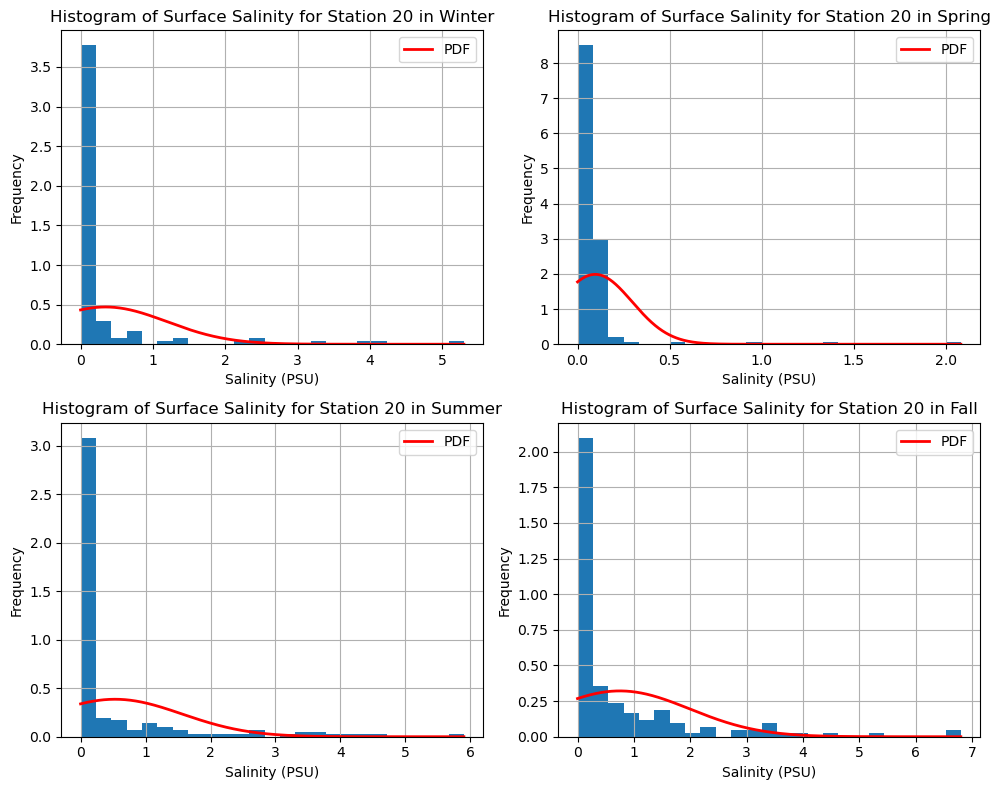

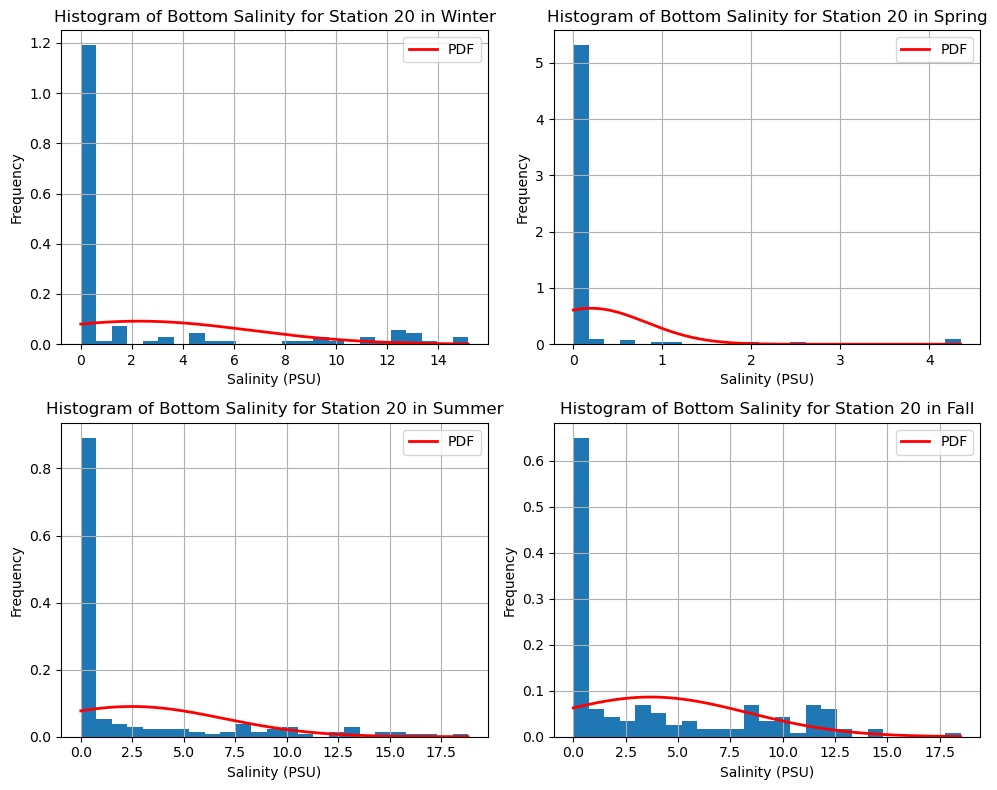

In [18]:
#################################### Station 20 ################################################

################################# Histogram ########################################################################
# Generate a sample bin-averaged probability distribution function for seasonal salinity mean at each station in S_stats_season

bins = round(np.sqrt((len(S_sta_20['S']))), 0)
print(bins)

std_dev = S_sta_20['S']['Sal'].std()
NS = len(S_sta_20['S'])
SSbins = round(3.5 * (std_dev / (NS ** (-1/3))))
print("20-S Bins:", SSbins)

# Create subplots for each season
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()  # Flatten the array for easy iteration

seasons = ['Winter', 'Spring', 'Summer', 'Fall']
for i, season in enumerate(seasons):
    S_data = S_sta_20['S'][S_sta_20['S']['Season'] == season]
    min_val = S_data['Sal'].min()
    max_val = S_data['Sal'].max()

    sample_mean = S_data['Sal'].mean()
    std_dev = S_data['Sal'].std()

    # Generate x-values for the estimated normal distribution
    x_val = np.linspace(min_val, max_val, 1000)

    # Create the estimated normal distribution
    pdf_est = norm.pdf(x_val, loc=sample_mean, scale=std_dev)

    # Plot on respective subplot
    axs[i].hist(S_data['Sal'], bins=25, range=(min_val, max_val), density=True)
    axs[i].plot(x_val, pdf_est, linewidth=2, color='red', label='PDF')
    axs[i].set_title(f'Histogram of Surface Salinity for Station 20 in {season}')
    axs[i].set_xlabel('Salinity (PSU)')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

output_dir = '/Users/kboot/phy577_projects/proj/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal_Hist_S20.png'))


# Create subplots for each season
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()  # Flatten the array for easy iteration

seasons = ['Winter', 'Spring', 'Summer', 'Fall']
for i, season in enumerate(seasons):
    B_data = S_sta_20['B'][S_sta_20['B']['Season'] == season]
    min_val = B_data['Sal'].min()
    max_val = B_data['Sal'].max()

    sample_mean = B_data['Sal'].mean()
    std_dev = B_data['Sal'].std()

    # Generate x-values for the estimated normal distribution
    x_val = np.linspace(min_val, max_val, 1000)

    # Create the estimated normal distribution
    pdf_est = norm.pdf(x_val, loc=sample_mean, scale=std_dev)

    # Plot on respective subplot
    axs[i].hist(B_data['Sal'], bins=25, range=(min_val, max_val), density=True)
    axs[i].plot(x_val, pdf_est, linewidth=2, color='red', label='PDF')
    axs[i].set_title(f'Histogram of Bottom Salinity for Station 20 in {season}')
    axs[i].set_xlabel('Salinity (PSU)')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

output_dir = '/Users/kboot/phy577_projects/proj/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal_Hist_B20.png'))



24.0
144


NameError: name 'os' is not defined

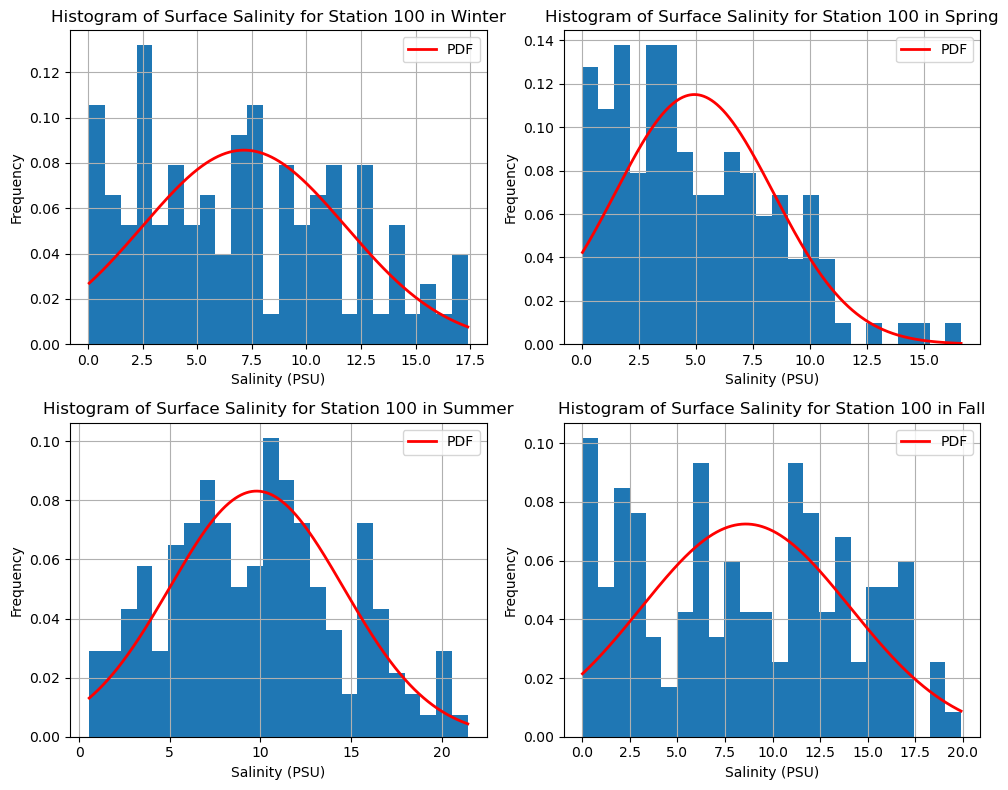

In [11]:
#################################### Station 100 ################################################

################################# Histogram ########################################################################
# Generate a sample bin-averaged probability distribution function for seasonal salinity mean at each station in S_stats_season



bins = round(np.sqrt((len(S_sta_100['S']))), 0)
print(bins)

std_dev = S_sta_100['S']['Sal'].std()
NS = len(S_sta_100['S'])
SSbins = round(3.5 * (std_dev / (NS ** (-1/3))))
print(SSbins)


# Create subplots for each season
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()  # Flatten the array for easy iteration

seasons = ['Winter', 'Spring', 'Summer', 'Fall']
for i, season in enumerate(seasons):
    S_data = S_sta_100['S'][S_sta_100['S']['Season'] == season]
    min_val = S_data['Sal'].min()
    max_val = S_data['Sal'].max()

    sample_mean = S_data['Sal'].mean()
    std_dev = S_data['Sal'].std()

    # Generate x-values for the estimated normal distribution
    x_val = np.linspace(min_val, max_val, 1000)

    # Create the estimated normal distribution
    pdf_est = norm.pdf(x_val, loc=sample_mean, scale=std_dev)

    # Plot on respective subplot
    axs[i].hist(S_data['Sal'], bins=24, range=(min_val, max_val), density=True)
    axs[i].plot(x_val, pdf_est, linewidth=2, color='red', label='PDF')
    axs[i].set_title(f'Histogram of Surface Salinity for Station 100 in {season}')
    axs[i].set_xlabel('Salinity (PSU)')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal_Hist_S100.png'))


# Create subplots for each season
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()  # Flatten the array for easy iteration

seasons = ['Winter', 'Spring', 'Summer', 'Fall']
for i, season in enumerate(seasons):
    B_data = S_sta_100['B'][S_sta_100['B']['Season'] == season]
    min_val = B_data['Sal'].min()
    max_val = B_data['Sal'].max()

    sample_mean = B_data['Sal'].mean()
    std_dev = B_data['Sal'].std()

    # Generate x-values for the estimated normal distribution
    x_val = np.linspace(min_val, max_val, 1000)

    # Create the estimated normal distribution
    pdf_est = norm.pdf(x_val, loc=sample_mean, scale=std_dev)

    # Plot on respective subplot
    axs[i].hist(B_data['Sal'], bins=24, range=(min_val, max_val), density=True)
    axs[i].plot(x_val, pdf_est, linewidth=2, color='red', label='PDF')
    axs[i].set_title(f'Histogram of Bottom Salinity for Station 100 in {season}')
    axs[i].set_xlabel('Salinity (PSU)')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal_Hist_B100.png'))



21.0
128


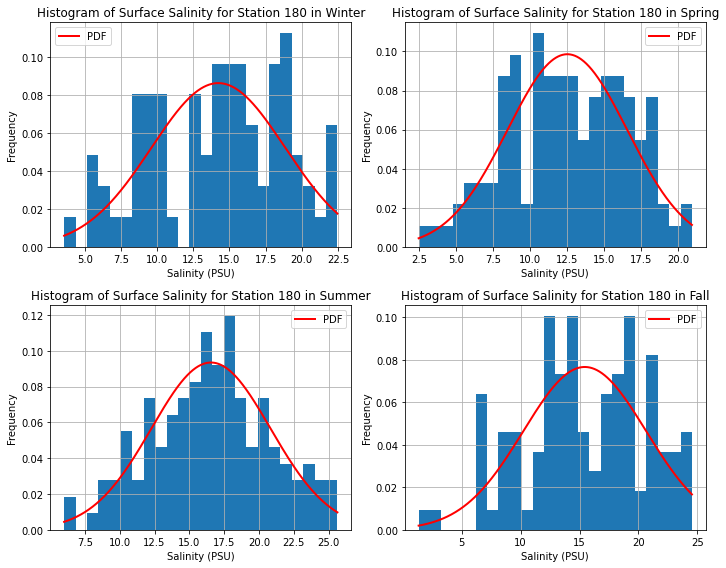

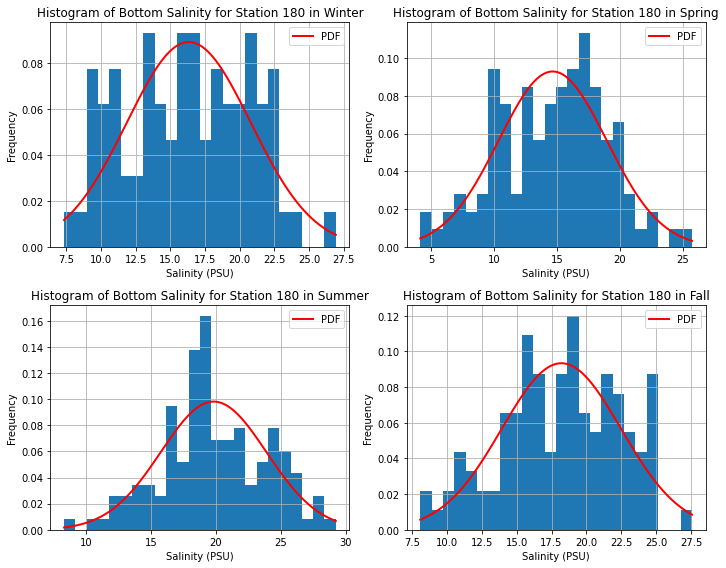

In [160]:
#################################### Station 180 ################################################

################################# Histogram ########################################################################
# Generate a sample bin-averaged probability distribution function for seasonal salinity mean at each station in S_stats_season

bins = round(np.sqrt((len(S_sta_180['S']))), 0)
print(bins)

std_dev = S_sta_180['S']['Sal'].std()
NS = len(S_sta_180['S'])
SSbins = round(3.5 * (std_dev / (NS ** (-1/3))))
print(SSbins)


# Create subplots for each season
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()  # Flatten the array for easy iteration

seasons = ['Winter', 'Spring', 'Summer', 'Fall']
for i, season in enumerate(seasons):
    S_data = S_sta_180['S'][S_sta_180['S']['Season'] == season]
    min_val = S_data['Sal'].min()
    max_val = S_data['Sal'].max()

    sample_mean = S_data['Sal'].mean()
    std_dev = S_data['Sal'].std()

    # Generate x-values for the estimated normal distribution
    x_val = np.linspace(min_val, max_val, 1000)

    # Create the estimated normal distribution
    pdf_est = norm.pdf(x_val, loc=sample_mean, scale=std_dev)

    # Plot on respective subplot
    axs[i].hist(S_data['Sal'], bins=24, range=(min_val, max_val), density=True)
    axs[i].plot(x_val, pdf_est, linewidth=2, color='red', label='PDF')
    axs[i].set_title(f'Histogram of Surface Salinity for Station 180 in {season}')
    axs[i].set_xlabel('Salinity (PSU)')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal_Hist_S180.png'))


# Create subplots for each season
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.ravel()  # Flatten the array for easy iteration

seasons = ['Winter', 'Spring', 'Summer', 'Fall']
for i, season in enumerate(seasons):
    B_data = S_sta_180['B'][S_sta_180['B']['Season'] == season]
    min_val = B_data['Sal'].min()
    max_val = B_data['Sal'].max()

    sample_mean = B_data['Sal'].mean()
    std_dev = B_data['Sal'].std()

    # Generate x-values for the estimated normal distribution
    x_val = np.linspace(min_val, max_val, 1000)

    # Create the estimated normal distribution
    pdf_est = norm.pdf(x_val, loc=sample_mean, scale=std_dev)

    # Plot on respective subplot
    axs[i].hist(B_data['Sal'], bins=24, range=(min_val, max_val), density=True)
    axs[i].plot(x_val, pdf_est, linewidth=2, color='red', label='PDF')
    axs[i].set_title(f'Histogram of Bottom Salinity for Station 180 in {season}')
    axs[i].set_xlabel('Salinity (PSU)')
    axs[i].set_ylabel('Frequency')
    axs[i].legend()
    axs[i].grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal_Hist_B180.png'))



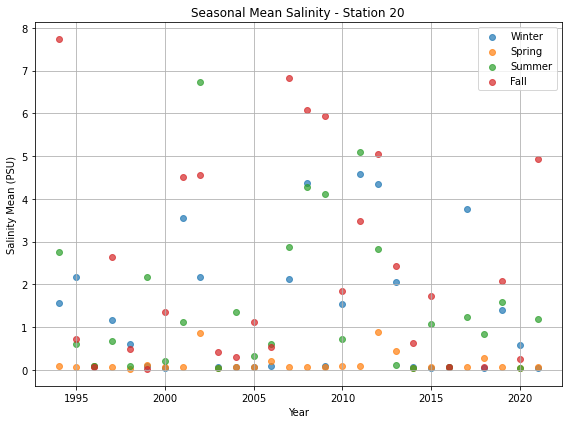

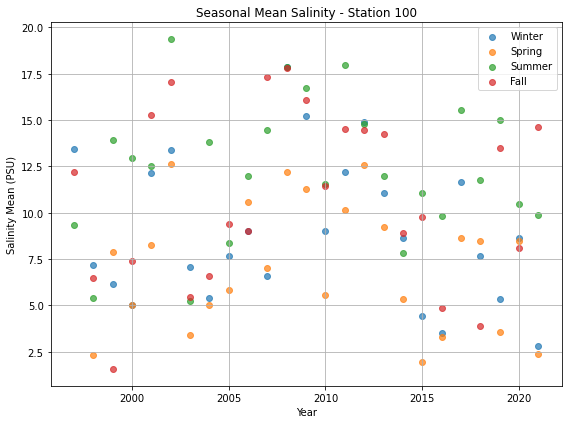

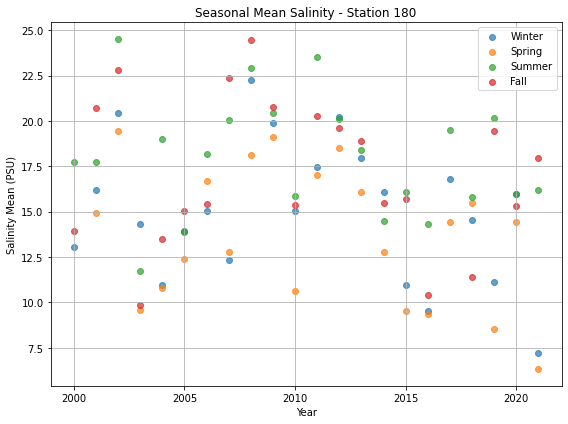

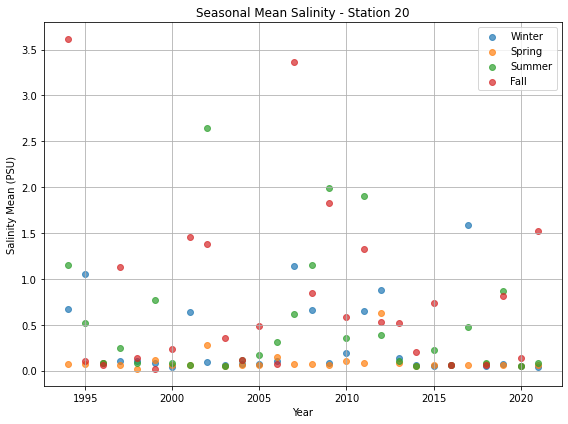

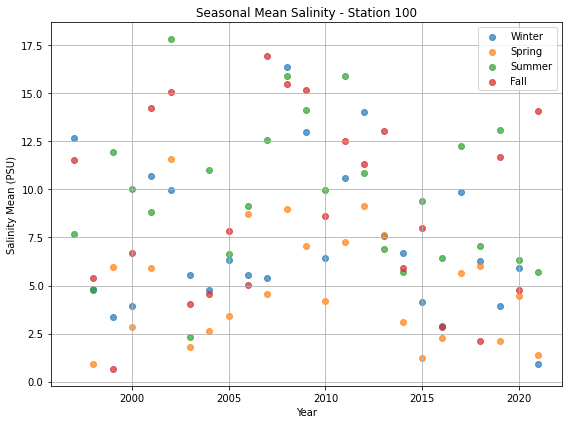

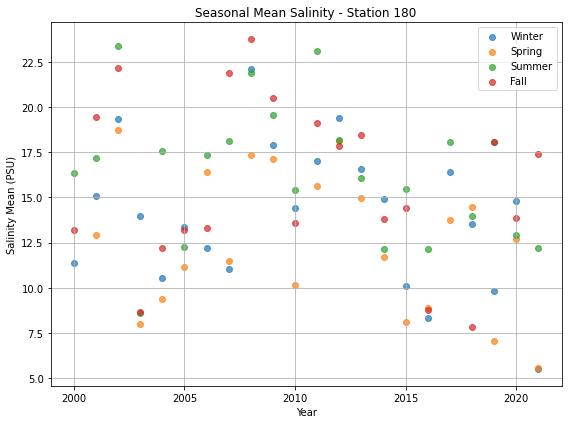

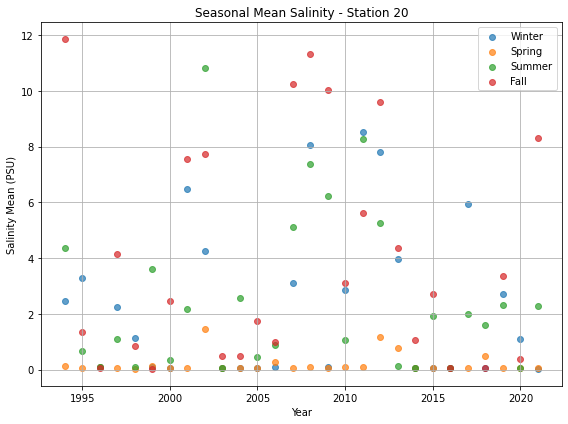

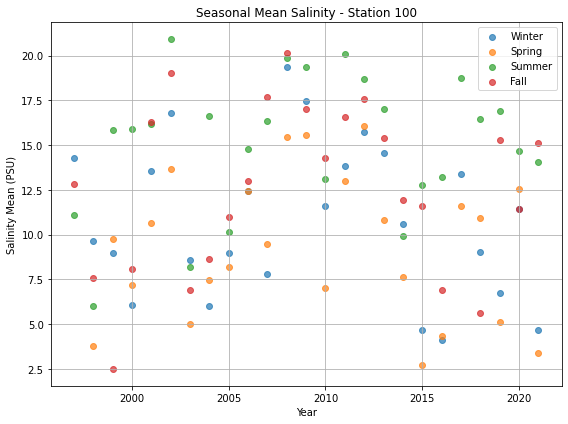

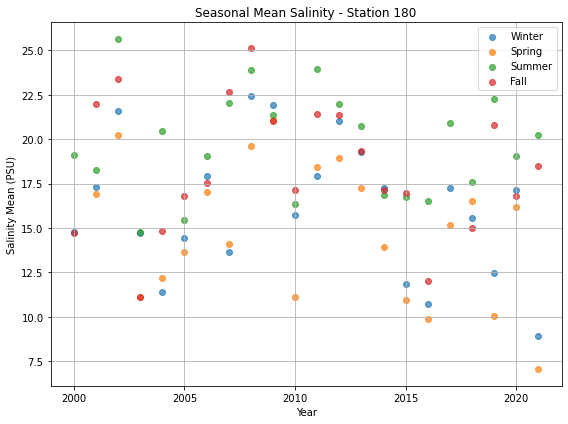

In [126]:
import matplotlib.pyplot as plt

def plot_seasonal_mean(stats_list):
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']

    for stat in stats_list:
        station = list(stat.keys())[0]  # Retrieve station name
        data = list(stat.values())[0]

        fig, axs = plt.subplots(figsize=(8, 6))

        for season in seasons:
            seasonal_mean = data.loc[data.index.get_level_values('Season') == season, 'mean']
            if not seasonal_mean.empty:
                years = seasonal_mean.index.get_level_values('Year')
                salinity_means = seasonal_mean.values

                axs.scatter(years, salinity_means, marker='o', label=season, alpha=0.7)

        axs.set_title(f'Seasonal Mean Salinity - Station {station}')
        axs.set_xlabel('Year')
        axs.set_ylabel('Salinity Mean (PSU)')
        axs.legend()
        axs.grid(True)

        plt.tight_layout()
        plt.show()

# Example usage
plot_seasonal_mean(S_stats_season)
plot_seasonal_mean(SS_stats_season)
plot_seasonal_mean(BS_stats_season)



In [74]:
################################# Function to Plot Monthly Mean Sal Data #####################################

import matplotlib.pyplot as plt

def plot_monthly_salinity(stats_list, month_number):
    month_data = []
    
    for stat in stats_list:
        for station, data in stat.items():
            monthly_mean = data.loc[(data.index.get_level_values('Month') == month_number), 'mean']
            month_data.append((station, monthly_mean))
    
    plt.figure(figsize=(10, 6))
    for station, monthly_mean in month_data:
        plt.scatter(monthly_mean.index.get_level_values('Year').values, monthly_mean.values, label=f'Station {station}')
    
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    month_name = months[month_number - 1]
    
    plt.title(f'Mean Salinity for {month_name} Across Observed Period')
    plt.xlabel('Year')
    plt.ylabel('Salinity Mean (PSU)')
    plt.legend()
    plt.grid(True)
    plt.show()
    

# Example usage for January (month number 1)
plot_monthly_salinity(S_stats_mo, 1)  # Change S_stats_mo to the desired variable and specify the month number
plot_monthly_salinity(SS_stats_mo, 1)
plot_monthly_salinity(BS_stats_mo, 1)

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Sta_Mo.png'))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_monthly_mean_distribution(stats_list, month_number):
    month_data = []

    for stat in stats_list:
        for station, data in stat.items():
            monthly_mean = data.loc[(data.index.get_level_values('Month') == month_number), 'mean']
            month_data.extend(monthly_mean.values)

    plt.figure(figsize=(10, 6))

    # Histogram plot
    plt.subplot(1, 2, 1)
    sns.histplot(month_data, bins=20, kde=False)
    plt.title('Monthly Mean Salinity Distribution (Histogram)')
    plt.xlabel('Salinity Mean (PSU)')
    plt.ylabel('Frequency')

    # PDF plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(month_data, bw_adjust=0.5)
    plt.title('Monthly Mean Salinity Distribution (PDF)')
    plt.xlabel('Salinity Mean (PSU)')
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

# Example usage for January (month number 1)
plot_monthly_mean_distribution(S_stats_mo, 1)  # Change S_stats_mo to the desired variable and specify the month number


In [38]:
################################ Calculate Stats - Monthly and Annual ##############################################

S_stats_mo = []
S_stats_yr = []

def compute_stats_MY(dataset, data_type):
    for station, data in dataset.items():
        monthly_stats = data.groupby(data['Time'].dt.month)['Sal'].agg(['mean', 'std', 'skew', 'var'])
        monthly_stats.index.name = 'Month'
        S_stats_mo.append({station: monthly_stats})
    
        yr_stats = data.groupby(data['Time'].dt.year)['Sal'].agg(['mean', 'std', 'skew', 'var'])
        yr_stats.index.name = 'Year'
        {dataset}_stats_yr.append({station: yr_stats})

        print("Monthly Stat Calcs for Station:", station)
        print(monthly_stats)
    
        print("Annual Stat Calcs for Station:", station)
        print(yr_stats)

compute_stats_MY(S_sta, 'All Obs')
compute_stats_MY(SS, 'Surface')
compute_stats_MY(BS, 'Bottom')

'''
######## Create a function to calculate and plot monthly and yearly statistics for all three datasets

def plot_stats(data_stats, data_type):
    for i, stat in enumerate(dataset):
        station, stats = stat.items()[0]
        fig, axs = plt.subplots(2, 1, figsize=(10, 10))
        
        axs[0].plot(stats.index, stats['mean'], label='Mean')
        axs[0].plot(stats.index, stats['std'], label='Std')
        axs[0].set_title(f'Station {station} {data_type} Monthly Statistics')
        axs[0].set_xlabel('Time')
        axs[0].set_ylabel('Values')
        axs[0].legend()
        axs[0].grid(True)
        
        axs[1].plot(stats.index, stats['skew'], label='Skewness')
        axs[1].plot(stats.index, stats['var'], label='Variance')
        axs[1].set_title(f'Station {station} {data_type} Yearly Statistics')
        axs[1].set_xlabel('Time')
        axs[1].set_ylabel('Values')
        axs[1].legend()
        axs[1].grid(True)
        
        plt.tight_layout()
        #plt.savefig(os.path.join(output_dir, f'NRE_{data_type}_Stats_Station_{station}.png'))

# Plotting statistics for S_sta
plot_stats(S_sta, 'All Obs')
plot_stats(SS, 'Surface')
plot_stats(BS, 'Bottom')

    
'''


Monthly Stat Calcs for Station: 20
           mean       std      skew        var
Month                                         
1      0.949143  2.764027  3.579914   7.639843
2      0.320488  1.451540  7.396318   2.106968
3      0.134474  0.464417  7.477174   0.215683
4      0.085364  0.105619  6.221470   0.011155
5      0.215000  0.636554  5.260011   0.405201
6      0.571786  1.586987  3.812738   2.518527
7      1.197105  3.064481  3.443124   9.391046
8      2.615000  4.329681  1.971586  18.746137
9      1.971917  3.289641  1.916443  10.821740
10     2.568559  4.039935  1.781775  16.321076
11     2.280119  3.757966  1.841131  14.122310
12     2.527353  4.525773  1.774421  20.482623
Annual Stat Calcs for Station: 20
          mean       std      skew        var
Year                                         
1994  3.177273  5.014067  1.805029  25.140867
1995  0.730769  2.038506  4.657806   4.155505
1996  0.078846  0.041238 -1.454956   0.001701
1997  1.051923  2.257318  3.023606   5.0954

"\n######## Create a function to calculate and plot monthly and yearly statistics for all three datasets\n\ndef plot_stats(data_stats, data_type):\n    for i, stat in enumerate(dataset):\n        station, stats = stat.items()[0]\n        fig, axs = plt.subplots(2, 1, figsize=(10, 10))\n        \n        axs[0].plot(stats.index, stats['mean'], label='Mean')\n        axs[0].plot(stats.index, stats['std'], label='Std')\n        axs[0].set_title(f'Station {station} {data_type} Monthly Statistics')\n        axs[0].set_xlabel('Time')\n        axs[0].set_ylabel('Values')\n        axs[0].legend()\n        axs[0].grid(True)\n        \n        axs[1].plot(stats.index, stats['skew'], label='Skewness')\n        axs[1].plot(stats.index, stats['var'], label='Variance')\n        axs[1].set_title(f'Station {station} {data_type} Yearly Statistics')\n        axs[1].set_xlabel('Time')\n        axs[1].set_ylabel('Values')\n        axs[1].legend()\n        axs[1].grid(True)\n        \n        plt.tight_lay

In [ ]:
################################ Figure for Monthly & Annual  Statistical Moments ##############################################

fig, axs = plt.subplots(len(S_stats_mo), figsize=(10, 6 * len(S_stats_mo)))

for i, stats in enumerate(S_stats_mo):
    station = list(stats.keys())[0]
    monthly_means = stats[station]['mean']
    mo_names = [calendar.month_name[month] for month in monthly_means.index]

    axs[i].scatter(mo_names, monthly_means.values)
    axs[i].set_title(f'Station {station} Monthly Mean Salinity')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Mean Salinity (PSU)')
    axs[i].tick_params(axis='x', rotation=315)
    axs[i].grid(True)
    
plt.tight_layout()
plt.show()

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Sta_Mo.png'))

################################ Figure for Annual Statistical Moments ##############################################

fig, axs = plt.subplots(len(S_stats_yr), figsize=(10, 6 * len(S_stats_yr)))

for i, stats in enumerate(S_stats_yr):
    station = list(stats.keys())[0]
    annual_means = stats[station]['mean']

    axs[i].scatter(annual_means.index, annual_means.values)
    axs[i].set_title(f'Station {station} Annual Mean Salinity')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Mean Salinity (PSU)')
    axs[i].tick_params(axis='x', rotation=315)
    axs[i].grid(True)
    
plt.tight_layout()
plt.show()

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Sta_Yr.png'))

In [ ]:
############################## Histogram ###########################################################

sta_100 = S_sta[100]

# Group into surface salinity, mid salinity, and deep salinity

SS_100 = sta_100[sta_100['S_Dep'] == 'S']
BS_100 = sta_100[sta_100['S_Dep'] == 'B']


############################## Surface Salinity Histogram ##################3
'''
sal_range = (min(SS_100['Sal']), max(SS_100['Sal']))
num_bins = 20 ## estimate later

S_hist, S_bin_edges = np.histogram(SSal['SURF_SAL_PSU'], bins=num_bins, range=sal_range, density=True)





############################### Estimated Normal Distribution ##################
# Generate x-values for the estimated normal distribution


S_x_val = np.linspace(sal_range[0], sal_range[1], 1000) 
S_pdf_est = norm.pdf(S_x_val, loc=SS_mean, scale=SS_SD)

############################### Plot the PDF ###############################
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax1.set_ylabel('Probability Distribution')
ax2.bar(S_bin_cent, S_hist, width=(S_bin_cent[1] - S_bin_cent[0]), align='center ax2.plot(S_x_val, S_pdf_est, color='red', label='Estimated Normal Distribution') ax2.set_xlabel('Salinity (PSU)')
ax2.set_ylabel('Probability Distribution')
plt.suptitle('Surface Temperature and Salinity PDF') ax1.grid(True)

savefig(os.path.join(output_dir, 'LJ_PDF_Hist.png')) bin_width_temp = (temp_range[1] - temp_range[0]) / num_bins
bin_width_salinity = (sal_range[1] - sal_range[0]) / num_bins

print(f"Salinity bin width: {round(bin_width_salinity,2)} (PSU)")
'''        

'''
# Group salinity data by month for station 100
mo_sal = sta_100.groupby(sta_100['Time'].dt.month)['Sal']

# Create a histogram for each month
fig, axs = plt.subplots(len(mo_sal), figsize=(8, 6 * len(mo_sal)))

for i, (month, salinity_data) in enumerate(mo_sal):
    axs[i].hist(salinity_data, bins=20, density=True)
    month_name = calendar.month_name[month]

    axs[i].set_title(f'Station 100 Salinity - {month_name}')
    axs[i].set_xlabel('Salinity (PSU)')
    axs[i].set_ylabel('Probability Density')
    axs[i].grid(True)

plt.tight_layout()
plt.show()
'''

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

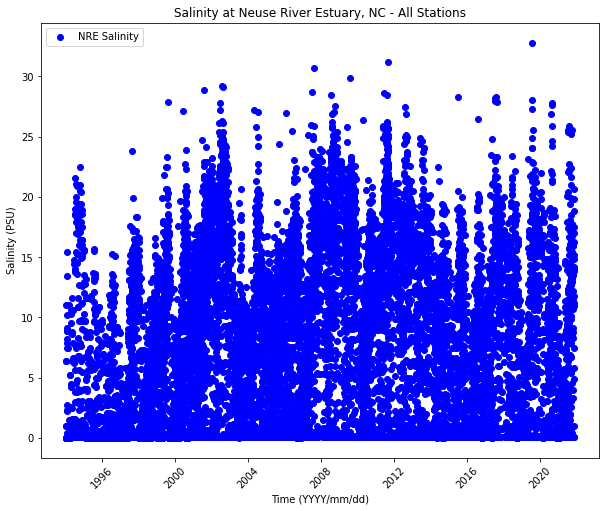

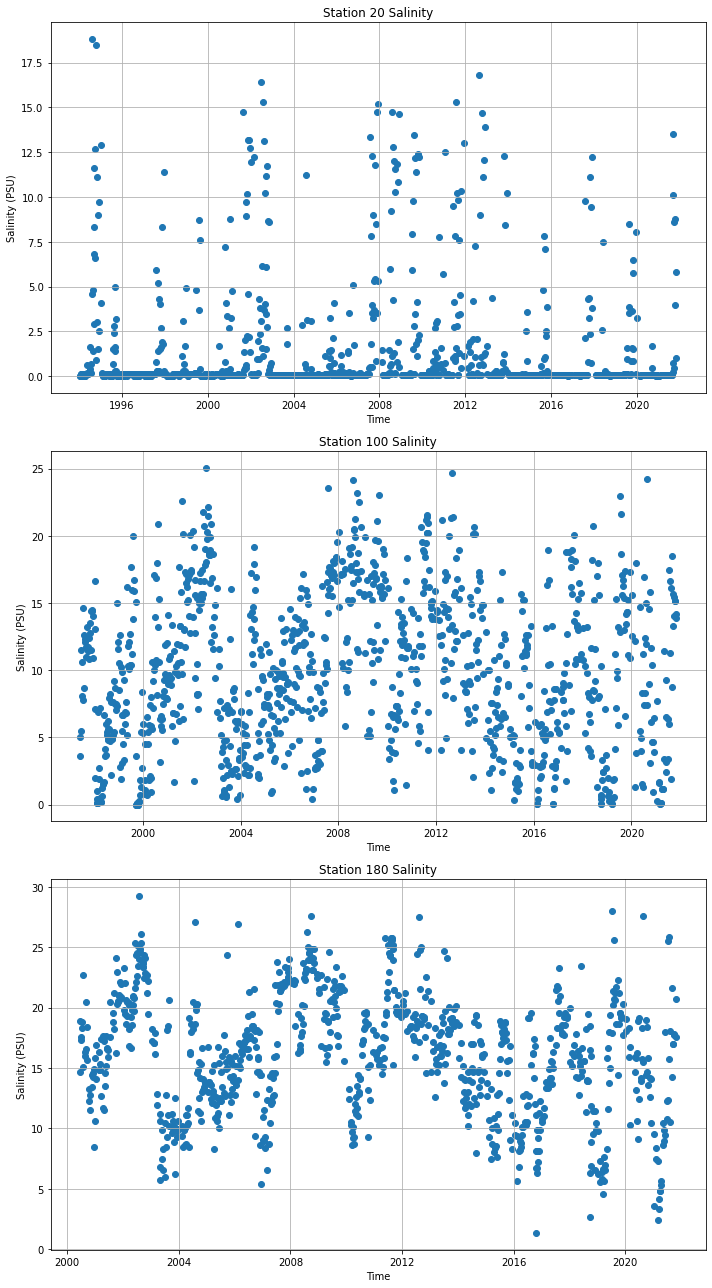

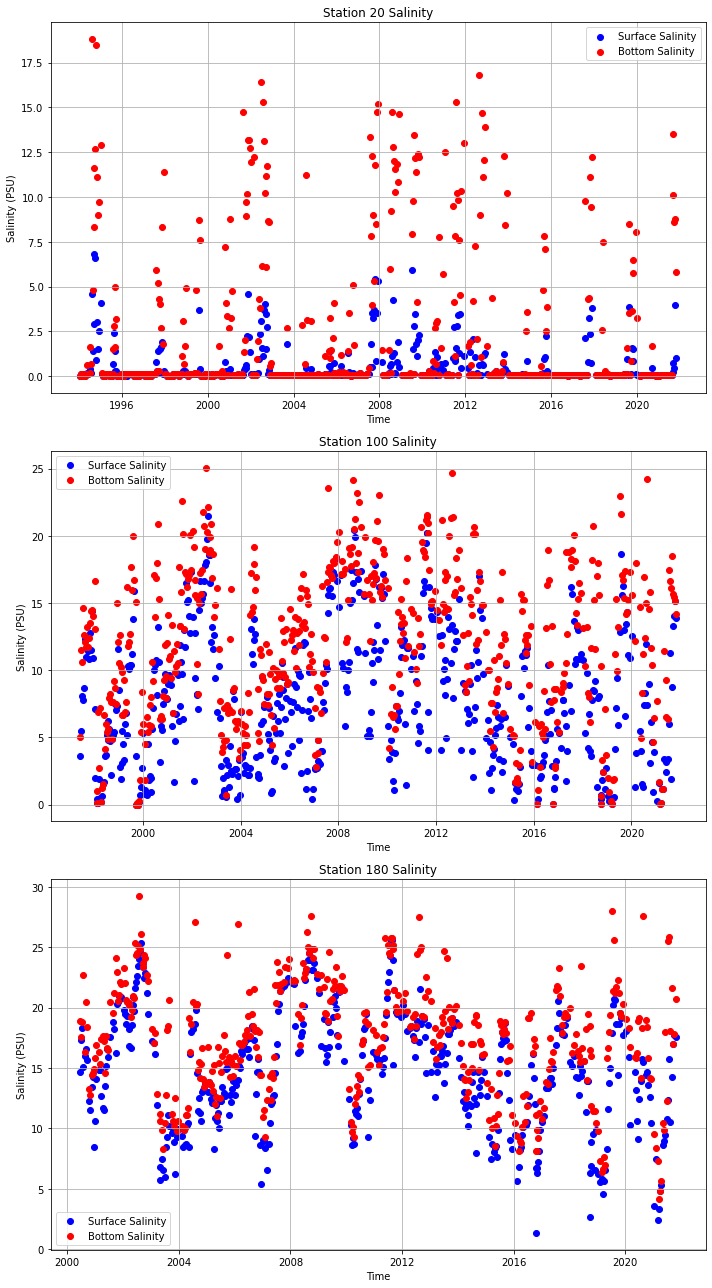

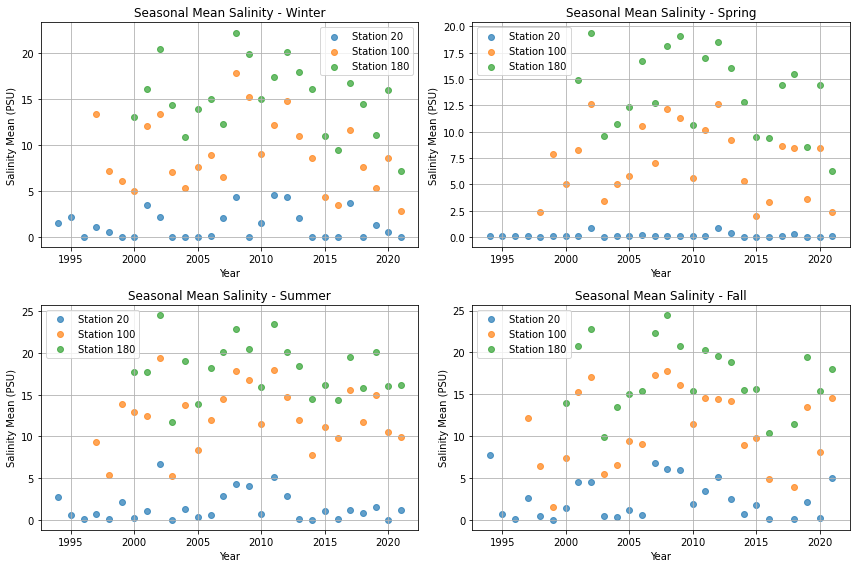

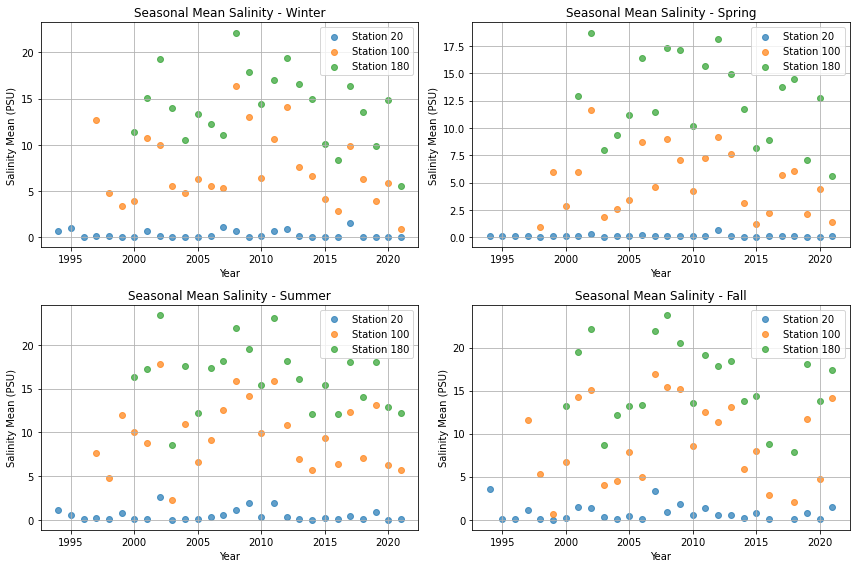

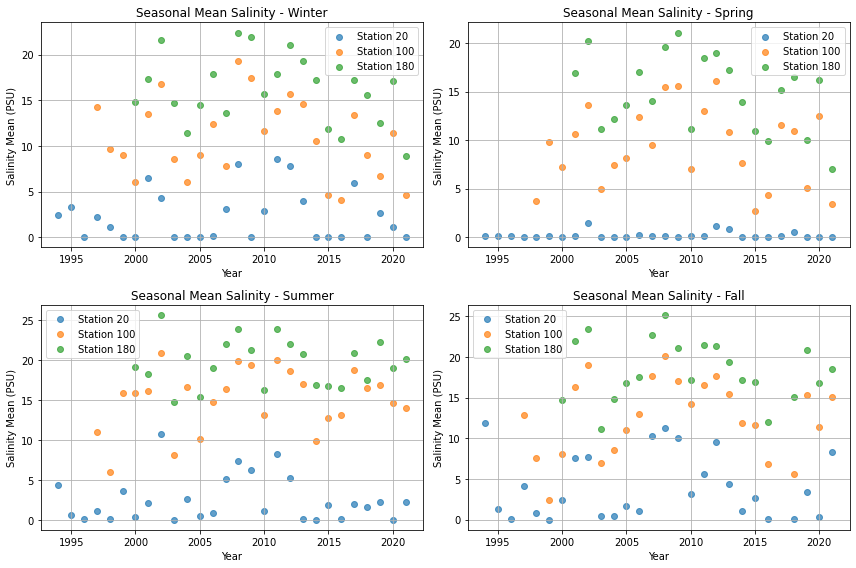

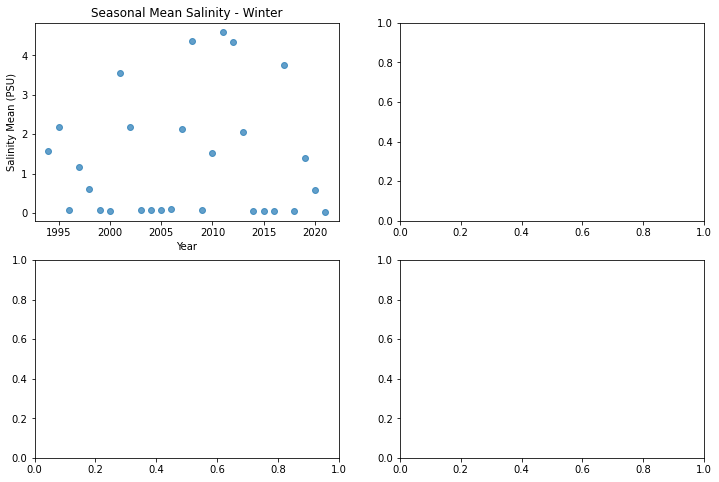

In [163]:
################################################ Final Data Plots ####################################################
###############################################################################################################

################################ Temperature and Salinity Time-Series - All Stations ####################################################

plt.figure(figsize=(10, 8))
plt.scatter(S['Time'].values, S['Sal'].values, color='blue', label='NRE Salinity')
plt.xlabel('Time (YYYY/mm/dd)')
plt.ylabel('Salinity (PSU)')
plt.xticks(rotation=45)
plt.legend()
plt.title('Salinity at Neuse River Estuary, NC - All Stations')

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_AllSta.png'))

'''
plt.figure(figsize=(10, 8))
plt.scatter(T['Time'].values, T['Temp'].values, color='red', label='NRE Temperature')
plt.xlabel('Time (YYYY/mm/dd)')
plt.ylabel('Temperature (C)')
plt.xticks(rotation=45)
plt.legend()
plt.title('Temperature at Neuse River Estuary, NC')

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Temp.png'))
'''

################################ Individual Station Timeseries -- Salinity ####################################################

fig, axs = plt.subplots(len(S_sta), figsize=(10, 6 * len(S_sta)))

for i, (station, data) in enumerate(S_sta.items()):
    axs[i].scatter(data['Time'].values, data['Sal'].values)
    axs[i].set_title(f'Station {station} Salinity')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Salinity (PSU)')
    axs[i].grid(True)
    plt.tight_layout()

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_StationsIndiv.png'))

################################ Individual Station Timeseries -- Surface and Bottom Salinity ####################################################

# Filter data for surface and bottom salinity

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'

fig, axs = plt.subplots(len(SS), 1, figsize=(10, 6 * len(SS)))

for i, (station, data) in enumerate(SS.items()):
    bs_data = BS[station]  # Get corresponding BS data for this station
    
    axs[i].scatter(data['Time'].values, data['Sal'].values, label='Surface Salinity', c='blue')
    axs[i].scatter(bs_data['Time'].values, bs_data['Sal'].values, label='Bottom Salinity', c='red')
    axs[i].set_title(f'Station {station} Salinity')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Salinity (PSU)')
    axs[i].grid(True)
    axs[i].legend()
    plt.tight_layout()

plt.savefig(os.path.join(output_dir, 'NRE_Sal_SandB_Stations.png'))


############################## Seasonal Mean Salinity Time Series for each station ########################################################

import matplotlib.pyplot as plt

def plot_seasonal_distribution(stats_list):
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()

    for i, season in enumerate(seasons):
        ax = axs[i]
        ax.set_title(f'Seasonal Mean Salinity - {season}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Salinity Mean (PSU)')

        for stat in stats_list:
            for station, data in stat.items():
                seasonal_mean = data.loc[data.index.get_level_values('Season') == season, 'mean']
                if not seasonal_mean.empty:
                    years = seasonal_mean.index.get_level_values('Year')
                    salinity_means = seasonal_mean.values

                    ax.scatter(years, salinity_means, marker='o', label=f'Station {station}', alpha=0.7)

        ax.legend()
        ax.grid(True)

    plt.tight_layout()


# Example usage for a particular season
plot_seasonal_distribution(S_stats_season)
output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal.png'))

plot_seasonal_distribution(SS_stats_season)
output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal_Surface.png'))

plot_seasonal_distribution(BS_stats_season)
output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal_Bottom.png'))


################################ Seasonal Linear Regression ####################################################

import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_seasonal_dist_reg(stats_list):
    seasons = ['Winter', 'Spring', 'Summer', 'Fall']
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()

    for i, season in enumerate(seasons):
        ax = axs[i]
        ax.set_title(f'Seasonal Mean Salinity - {season}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Salinity Mean (PSU)')

        for stat in stats_list:
            for station, data in stat.items():
                seasonal_mean = data.loc[data.index.get_level_values('Season') == season, 'mean']
                if not seasonal_mean.empty:
                    years = seasonal_mean.index.get_level_values('Year')
                    salinity_means = seasonal_mean.values

                    ax.scatter(years, salinity_means, marker='o', label=f'Station {station}', alpha=0.7)
                    
                    # Perform linear regression
                    slope, intercept, r_value, p_value, std_err = linregress(years, salinity_means)
                    regression_line = slope * years + intercept
                    
                    ax.plot(years, regression_line, color='red', label='Linear Regression', linewidth=2)
                    
        ax.legend()
        ax.grid(True)

    plt.tight_layout()

# Example usage for a particular season
plot_seasonal_dist_reg(S_stats_season)
output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal_Reg.png'))

plot_seasonal_dist_reg(SS_stats_season)
output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal_SurfaceReg.png'))

plot_seasonal_dist_reg(BS_stats_season)
output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
plt.savefig(os.path.join(output_dir, 'NRE_Sal_Seasonal_BottomReg.png'))

################################ Prob Dens Function (PDF) -- Seasonal Surface and Bottom Salinity ####################################################


In [7]:
# print(mod[0])

##################################### Station Info ##################################################3

# coordinates of PS stations (nre10 to nre180)

lon_nre = [-77.12220, -77.0904, -77.0765, -77.0353, -77.0317, -77.0064, -76.9693, -76.9594, -76.9442, -76.9215, -76.8755, -76.8418, -76.81515, -76.7678, -76.7374, -76.6977, -76.66407, -76.5972, -76.52602 ]
lat_nre = [35.21060, 35.17793, 35.15330, 35.11375, 35.10972, 35.07952, 35.02465, 35.01472, 34.99860, 34.99050, 34.97660, 34.96170, 34.94888, 34.9525, 34.96610, 34.98750, 35.0144, 35.0274, 35.06413]

stas_nre = arange(0,190,10)

# Create a map centered around the region
m = folium.Map(location=[min(lat_nre), max(lon_nre)], zoom_start=10)

# Add markers for each coordinate point
for lon, lat in zip(lon_nre, lat_nre):
    folium.Marker(location=[lat, lon]).add_to(m)

# Display the map

m

output_dir = '/Users/kboothomefolder/phy577_projects/proj2/figures'
m.save(os.path.join(output_dir, 'NRE_ModMon_map.html'))


################################## Figure for Station Points #############################################


'''

### Success
import sys  
!{sys.executable} -m pip install --user basemap

import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.basemap import Basemap


# Create a map using Basemap
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=min(lat_nre), urcrnrlat=max(lat_nre),
            llcrnrlon=min(lon_nre), urcrnrlon=max(lon_nre), resolution='h')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Plot coordinates on the map
x, y = m(lon_nre, lat_nre)
m.scatter(x, y, color='red', s=50, alpha=0.7, label='Coordinates')

plt.title('Coordinate Points on Map')
plt.legend()

'''

"\n\n### Success\nimport sys  \n!{sys.executable} -m pip install --user basemap\n\nimport matplotlib.pyplot as plt\nimport mpl_toolkits\nfrom mpl_toolkits.basemap import Basemap\n\n\n# Create a map using Basemap\nplt.figure(figsize=(10, 8))\nm = Basemap(projection='merc', llcrnrlat=min(lat_nre), urcrnrlat=max(lat_nre),\n            llcrnrlon=min(lon_nre), urcrnrlon=max(lon_nre), resolution='h')\n\nm.drawcoastlines()\nm.drawcountries()\nm.drawstates()\n\n# Plot coordinates on the map\nx, y = m(lon_nre, lat_nre)\nm.scatter(x, y, color='red', s=50, alpha=0.7, label='Coordinates')\n\nplt.title('Coordinate Points on Map')\nplt.legend()\n\n"

/opt/homebrew/lib/python3.8/site-packages/pandas/core/groupby/generic.py:285: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  f = lambda x: func(x, *args, **kwargs)
/opt/homebrew/lib/python3.8/site-packages/pandas/core/groupby/generic.py:285: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  f = lambda x: func(x, *args, **kwargs)
/opt/homebrew/lib/python3.8/site-packages/pandas/core/groupby/generic.py:285: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  f = lambda x: func(x, *args, **kwargs)
/opt/homebrew/lib/python3.8/site-packages/pandas/core/groupby/generic.py:285: RuntimeWarning: Precision loss occurred in moment ca

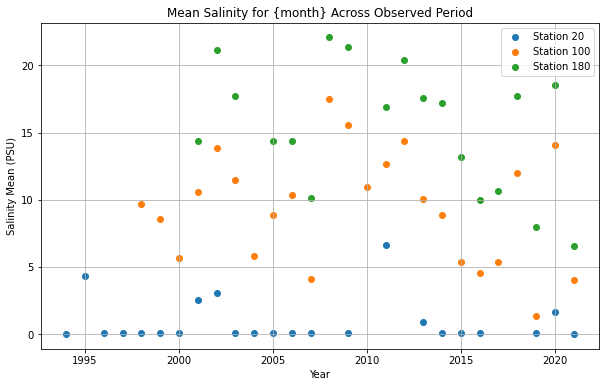

In [71]:
##################################### Plot means of one month for all years ###########################################33
'''

month_data = []
i = 1

# Extract January mean salinity for each station for every year
for stat in S_stats_mo:
    for station, data in stat.items():
        monthly_mean = data.loc[(data.index.get_level_values('Month') == i), 'mean']
        month_data.append((station, monthly_mean))

# Plotting time series for mean salinity for every January of every year
plt.figure(figsize=(10, 6))
for station, monthly_mean in month_data:
    plt.scatter(monthly_mean.index.get_level_values('Year').values, monthly_mean.values, label=f'Station {station}')

plt.title('Mean Salinity for {month} Across Observed Period')
plt.xlabel('Year')
plt.ylabel('Salinity Mean (PSU)')
plt.legend()
plt.grid(True)

'''